
<div align="center">
  <img src="https://drive.google.com/uc?export=view&id=141BJVwtPjNAL1F8yasImXWT9JA3ZjszY" width="500"><br><br>
  <img src="https://drive.google.com/uc?export=view&id=1Kxqq1-kCQb2xC0WDAchliOa4oVO24bc_" width="400">

<br>
<font color="5acfee" size="6">پاسخ مینی پروژه چهارم یادگیری ماشین</font><br>
<font color="5acfee" size="5">نگارش: علی شعبانپور مقدم - هدیه شوشیان</font><br>
<font color="5acfee" size="5">شماره دانشجویی: 40207304-40308054</font><br>
<font color="5acfee" size="5">استاد درس: دکتر مهدی علیاری شوره دلی</font><br>
<font color="5acfee" size="5">بهار 1404</font>

</div>

#Q1

<>:8: DeprecationWarning: invalid escape sequence '\/'


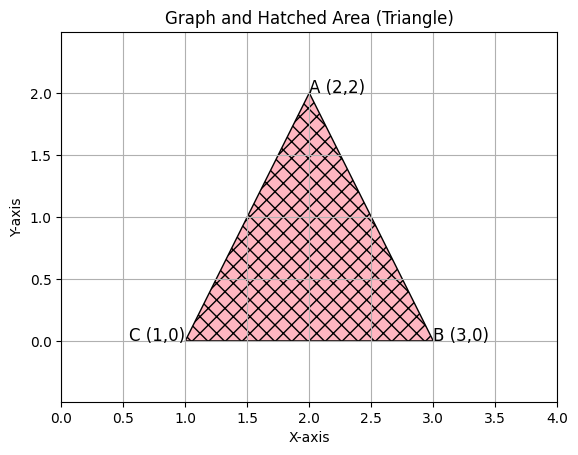

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the vertices of the triangle
vertices = np.array([[1, 0], [3, 0], [2, 2]])

# Create a polygon based on the vertices
triangle = plt.Polygon(vertices, closed=True, fill=1, edgecolor='black', facecolor='#FFB6C1', hatch='\/\/', label='Area Inside Triangle')

# Create the plot
fig, ax = plt.subplots()

# Add the triangle to the plot
ax.add_patch(triangle)

# Set the labels for vertices
for (x, y), label in zip(vertices, ['C (1,0)', 'B (3,0)', 'A (2,2)']):
    ax.text(x, y, label, fontsize=12, ha='right' if x<2 else 'left')

# Set limits, grid and labels
ax.set_xlim(0, 4)
ax.set_ylim(-1, 3)
ax.set_aspect('equal', adjustable='datalim')
plt.grid(True)
ax.set_title('Graph and Hatched Area (Triangle)')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Show the plot
plt.show()


In [ ]:
import numpy as np
#define muculloch pitts
class McCulloch_Pitts_neuron():

  def __init__(self , weights , threshold):
    self.weights = weights    #define weights
    self.threshold = threshold    #define threshold

  def model(self , x):
    #define model with threshold
    if self.weights @ x >= self.threshold:
        return 1
    else:
        return 0

In [ ]:
def Area(x, y):
  neur1 = McCulloch_Pitts_neuron([1, 0], 1)
  neur2 = McCulloch_Pitts_neuron([1, 0], 2)
  neur3 = McCulloch_Pitts_neuron([0, 1], 0.5)
  neur4 = McCulloch_Pitts_neuron([0, 1], 2.5)
  neur5 = McCulloch_Pitts_neuron([1, -1, 1, -1], 2)

  z1 = neur1.model(np.array([x, y]))
  z2 = neur2.model(np.array([x, y]))
  z3 = neur3.model(np.array([x, y]))
  z4 = neur4.model(np.array([x, y]))
  z5 = neur5.model(np.array([z1, z2, z3, z4]))

  return list([z4])

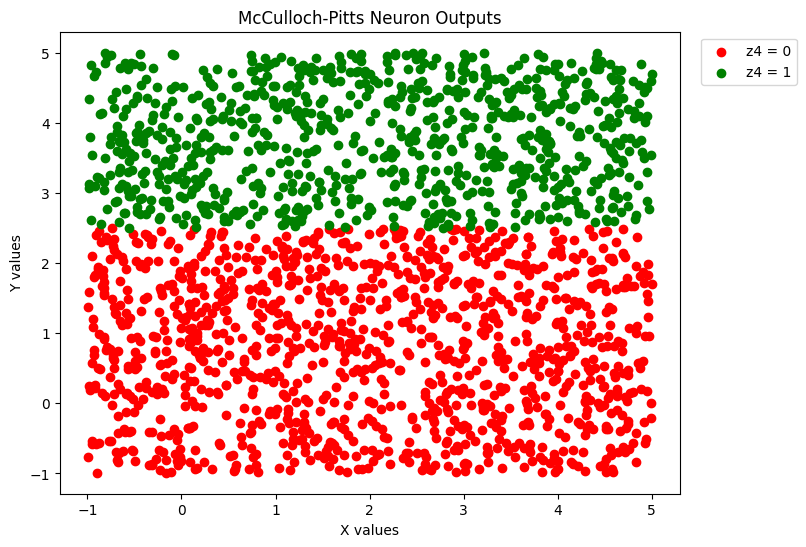

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

num_points = 2000
x_values = np.random.uniform(-1, 5, num_points)  # Updated x-axis limits
y_values = np.random.uniform(-1, 5, num_points)  # Updated y-axis limits
# Initialize lists to store data points for different z5 values
red_points = []
green_points = []

# Evaluate data points using the Area function
for i in range(num_points):
    z4_value = Area(x_values[i], y_values[i])
    if z4_value == [0]:
        red_points.append((x_values[i], y_values[i]))
    else:
        green_points.append((x_values[i], y_values[i]))

# Separate x and y values for red and green points
red_x, red_y = zip(*red_points)
green_x, green_y = zip(*green_points)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(red_x, red_y, color='red', label='z4 = 0')
plt.scatter(green_x, green_y, color='green', label='z4 = 1')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('McCulloch-Pitts Neuron Outputs')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.2, 1.0))
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define McCulloch-Pitts neuron with different activation functions
class McCulloch_Pitts_neuron():

    def __init__(self, weights, activation='threshold', threshold=0):
        self.weights = np.array(weights)
        self.activation = activation
        self.threshold = threshold

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def tanh(self, x):
        return np.tanh(x)

    def relu(self, x):
        return np.maximum(0, x)

    def model(self, x):
        linear_output = self.weights @ x
        if self.activation == 'threshold':
            return 1 if linear_output >= self.threshold else 0
        elif self.activation == 'sigmoid':
            return self.sigmoid(linear_output)
        elif self.activation == 'tanh':
            return self.tanh(linear_output)
        elif self.activation == 'relu':
            return self.relu(linear_output)
        else:
            raise ValueError("Unsupported activation function")

# Define model for dataset
def Area(x, y, activation='threshold'):
    neur1 = McCulloch_Pitts_neuron([2, 1], activation=activation, threshold=6)
    neur2 = McCulloch_Pitts_neuron([0, 1], activation=activation, threshold=0)
    neur3 = McCulloch_Pitts_neuron([-2, 1], activation=activation, threshold=-2)
    neur5 = McCulloch_Pitts_neuron([-1, 3, -1], activation=activation, threshold=2.5)

    z1 = neur1.model(np.array([x, y]))
    z2 = neur2.model(np.array([x, y]))
    z3 = neur3.model(np.array([x, y]))
    z4 = neur5.model(np.array([z1, z2, z3]))

    return z4


In [ ]:
def classify_and_plot(activation):
    num_points = 2000
    x_values = np.random.uniform(0, 4, num_points)
    y_values = np.random.uniform(-1, 3, num_points)

    red_points = []
    green_points = []

    for i in range(num_points):
        z4_value = Area(x_values[i], y_values[i], activation=activation)
        if z4_value < 0.5:
            red_points.append((x_values[i], y_values[i]))
        else:
            green_points.append((x_values[i], y_values[i]))

    red_x, red_y = zip(*red_points) if red_points else ([], [])
    green_x, green_y = zip(*green_points) if green_points else ([], [])

    plt.figure(figsize=(8, 6))
    plt.scatter(red_x, red_y, color='red', label='Output < 0.5')
    plt.scatter(green_x, green_y, color='green', label='Output >= 0.5')
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title(f'McCulloch-Pitts Neuron Outputs with {activation} activation')
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
    plt.show()




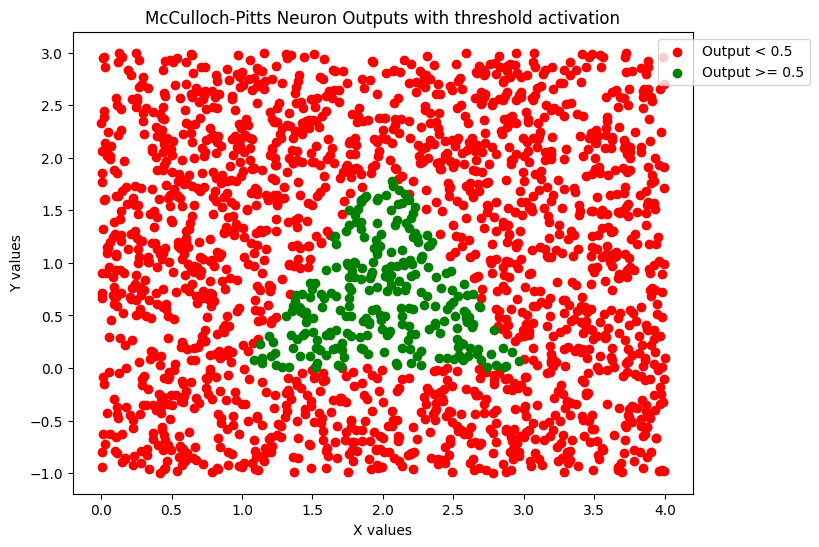

In [ ]:
classify_and_plot('threshold')

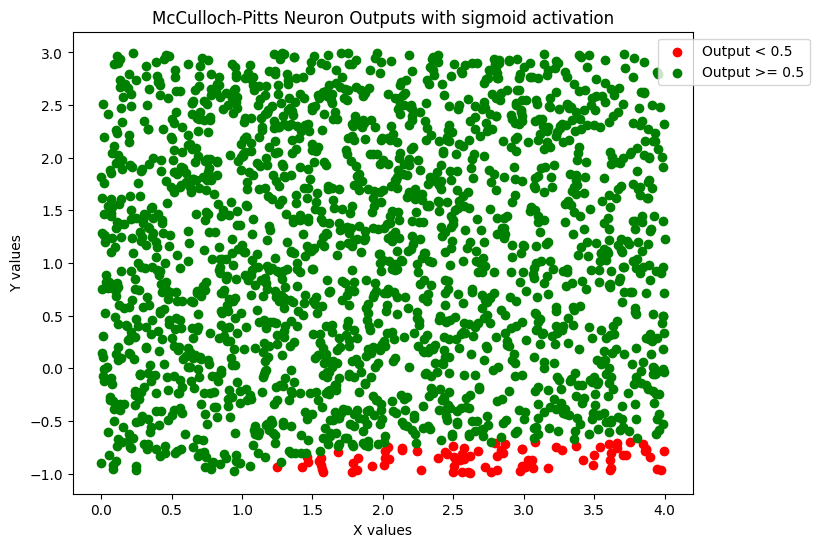

In [ ]:
classify_and_plot('sigmoid')

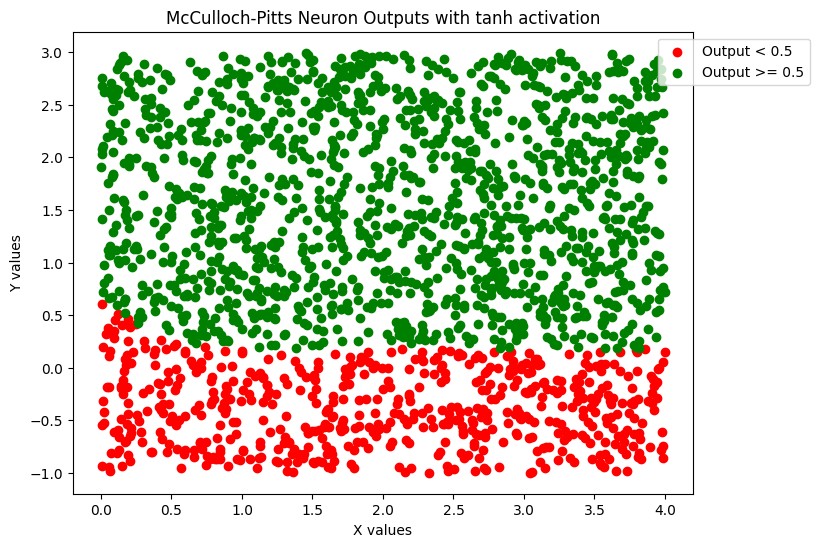

In [ ]:
classify_and_plot('tanh')

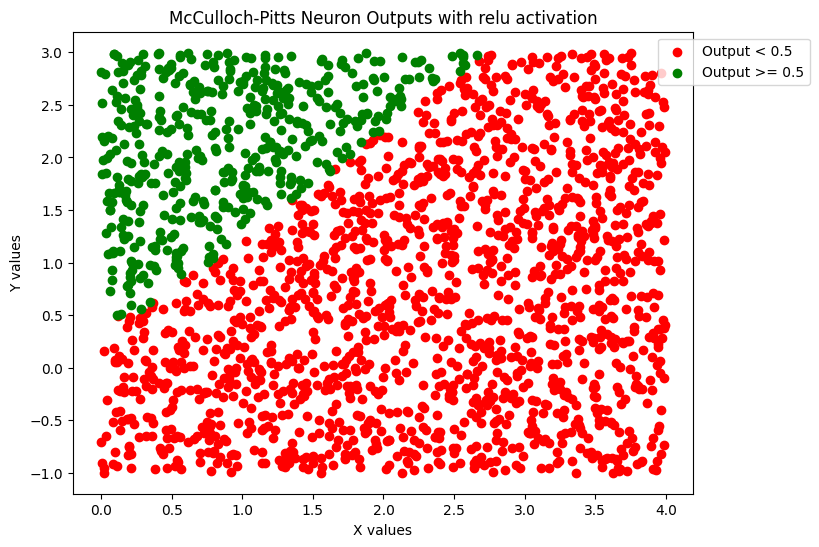

In [ ]:
classify_and_plot('relu')

#Q2

##2.1

###2.1.1

In [ ]:
# import the libraries
import numpy as np
import pandas as pd
from tqdm import tqdm
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


In [ ]:
# Downloading the dataset
path = kagglehub.dataset_download("thedevastator/weather-prediction")
print("Path to dataset files:", path)

# Load Data
weather_prediction_dataset = f"{path}/weather_prediction_dataset.csv"
df = pd.read_csv(weather_prediction_dataset)
df.head()


Path to dataset files: /kaggle/input/weather-prediction


,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [ ]:
# see all columns' names of dataset to find all cities' names
column_names = df.columns.tolist()
print("column_names:")
for name in column_names:
    print(name)

column_names:
DATE
MONTH
BASEL_cloud_cover
BASEL_humidity
BASEL_pressure
BASEL_global_radiation
BASEL_precipitation
BASEL_sunshine
BASEL_temp_mean
BASEL_temp_min
BASEL_temp_max
BUDAPEST_cloud_cover
BUDAPEST_humidity
BUDAPEST_pressure
BUDAPEST_global_radiation
BUDAPEST_precipitation
BUDAPEST_sunshine
BUDAPEST_temp_mean
BUDAPEST_temp_max
DE_BILT_cloud_cover
DE_BILT_wind_speed
DE_BILT_wind_gust
DE_BILT_humidity
DE_BILT_pressure
DE_BILT_global_radiation
DE_BILT_precipitation
DE_BILT_sunshine
DE_BILT_temp_mean
DE_BILT_temp_min
DE_BILT_temp_max
DRESDEN_cloud_cover
DRESDEN_wind_speed
DRESDEN_wind_gust
DRESDEN_humidity
DRESDEN_global_radiation
DRESDEN_precipitation
DRESDEN_sunshine
DRESDEN_temp_mean
DRESDEN_temp_min
DRESDEN_temp_max
DUSSELDORF_cloud_cover
DUSSELDORF_wind_speed
DUSSELDORF_wind_gust
DUSSELDORF_humidity
DUSSELDORF_pressure
DUSSELDORF_global_radiation
DUSSELDORF_precipitation
DUSSELDORF_sunshine
DUSSELDORF_temp_mean
DUSSELDORF_temp_min
DUSSELDORF_temp_max
HEATHROW_cloud_cover
HEAT

In [ ]:
# List of columns to keep (related to French cities : "Montelimar, Perpignan and Tours":)
french_columns = ["DATE", "MONTH",
                  "MONTELIMAR_wind_speed", "MONTELIMAR_humidity", "MONTELIMAR_pressure",
                  "MONTELIMAR_global_radiation", "MONTELIMAR_precipitation",
                  "MONTELIMAR_temp_mean", "MONTELIMAR_temp_min", "MONTELIMAR_temp_max",
                  "PERPIGNAN_wind_speed", "PERPIGNAN_humidity", "PERPIGNAN_pressure",
                  "PERPIGNAN_global_radiation", "PERPIGNAN_precipitation",
                  "PERPIGNAN_temp_mean", "PERPIGNAN_temp_min", "PERPIGNAN_temp_max",
                  "TOURS_wind_speed", "TOURS_humidity", "TOURS_pressure",
                  "TOURS_global_radiation", "TOURS_precipitation",
                  "TOURS_temp_mean", "TOURS_temp_min", "TOURS_temp_max"]
df = df[french_columns]

# DATE column should look like 'YYYY-MM-DD'
df["DATE"] = pd.to_datetime(df["DATE"], format="%Y%m%d")

print(df)

           DATE  MONTH  MONTELIMAR_wind_speed  MONTELIMAR_humidity  \
0    2000-01-01      1                    3.8                 0.85   
1    2000-01-02      1                    5.8                 0.82   
2    2000-01-03      1                    0.4                 0.92   
3    2000-01-04      1                    1.1                 0.85   
4    2000-01-05      1                    3.4                 0.82   
...         ...    ...                    ...                  ...   
3649 2009-12-28     12                    0.4                 0.87   
3650 2009-12-29     12                    1.8                 0.84   
3651 2009-12-30     12                    0.9                 0.94   
3652 2009-12-31     12                    0.3                 0.90   
3653 2010-01-01      1                    3.8                 0.86   

      MONTELIMAR_pressure  MONTELIMAR_global_radiation  \
0                  1.0269                         0.30   
1                  1.0287                  

/tmp/ipython-input-27-3636440408.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DATE"] = pd.to_datetime(df["DATE"], format="%Y%m%d")


###2.1.3

In [ ]:
# Get the earliest and latest date
start_date = df["DATE"].min()
end_date = df["DATE"].max()

print("Dataset covers:", start_date, "to", end_date)
print("number of days (samples) ", len(df) )


Dataset covers: 2000-01-01 00:00:00 to 2010-01-01 00:00:00
number of days (samples)  3654


###2.1.4

In [ ]:
# ✅ Copy original dataframe
df_split = df.copy()

# ✅ ایجاد ستون هدف (دمای فردای TOURS)
df_split["TOURS_temp_next"] = df_split["TOURS_temp_mean"].shift(-1)

# ✅ حذف سطر آخر که NaN شد بعد از shift
df_split = df_split.dropna()

# ✅ تقسیم داده‌ها براساس تاریخ به Train و Test
df_train = df_split[df_split["DATE"] < "2009-01-01"]
df_test = df_split[df_split["DATE"] >= "2009-01-01"]

# ✅ بررسی خروجی‌ها با پرینت
print("🔹 Total samples after dropna:", len(df_split))
print("🔹 Train samples:", len(df_train))
print("🔹 Test samples:", len(df_test))

print("\n📌 ستون‌های دیتافریم بعد از افزودن هدف:")
print(df_split.columns.tolist())

print("\n📌 تاریخ شروع و پایان:")
print("Train:", df_train['DATE'].min(), "تا", df_train['DATE'].max())
print("Test :", df_test['DATE'].min(), "تا", df_test['DATE'].max())

# اگر بخوای چند سطر اول رو هم ببینی:
print("\n🔍 چند سطر اول Train:")
print(df_train.head())

print("\n🔍 چند سطر اول Test:")
print(df_test.head())


🔹 Total samples after dropna: 3653
🔹 Train samples: 3288
🔹 Test samples: 365

📌 ستون‌های دیتافریم بعد از افزودن هدف:
['DATE', 'MONTH', 'MONTELIMAR_wind_speed', 'MONTELIMAR_humidity', 'MONTELIMAR_pressure', 'MONTELIMAR_global_radiation', 'MONTELIMAR_precipitation', 'MONTELIMAR_temp_mean', 'MONTELIMAR_temp_min', 'MONTELIMAR_temp_max', 'PERPIGNAN_wind_speed', 'PERPIGNAN_humidity', 'PERPIGNAN_pressure', 'PERPIGNAN_global_radiation', 'PERPIGNAN_precipitation', 'PERPIGNAN_temp_mean', 'PERPIGNAN_temp_min', 'PERPIGNAN_temp_max', 'TOURS_wind_speed', 'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation', 'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max', 'TOURS_temp_next']

📌 تاریخ شروع و پایان:
Train: 2000-01-01 00:00:00 تا 2008-12-31 00:00:00
Test : 2009-01-01 00:00:00 تا 2009-12-31 00:00:00

🔍 چند سطر اول Train:
        DATE  MONTH  MONTELIMAR_wind_speed  MONTELIMAR_humidity  \
0 2000-01-01      1                    3.8                 0.85   
1 2000-01-02   

##2.1.3 ادامه

✅ Train Scaled (head):
        DATE  MONTH  MONTELIMAR_wind_speed  MONTELIMAR_humidity  \
0 2000-01-01      1               0.287879             0.796875   
1 2000-01-02      1               0.439394             0.750000   
2 2000-01-03      1               0.030303             0.906250   
3 2000-01-04      1               0.083333             0.796875   
4 2000-01-05      1               0.257576             0.750000   

   MONTELIMAR_pressure  MONTELIMAR_global_radiation  MONTELIMAR_precipitation  \
0             0.775238                     0.077562                       0.0   
1             0.809524                     0.144044                       0.0   
2             0.864762                     0.141274                       0.0   
3             0.784762                     0.171745                       0.0   
4             0.708571                     0.188366                       0.0   

   MONTELIMAR_temp_mean  MONTELIMAR_temp_min  MONTELIMAR_temp_max  ...  \
0            

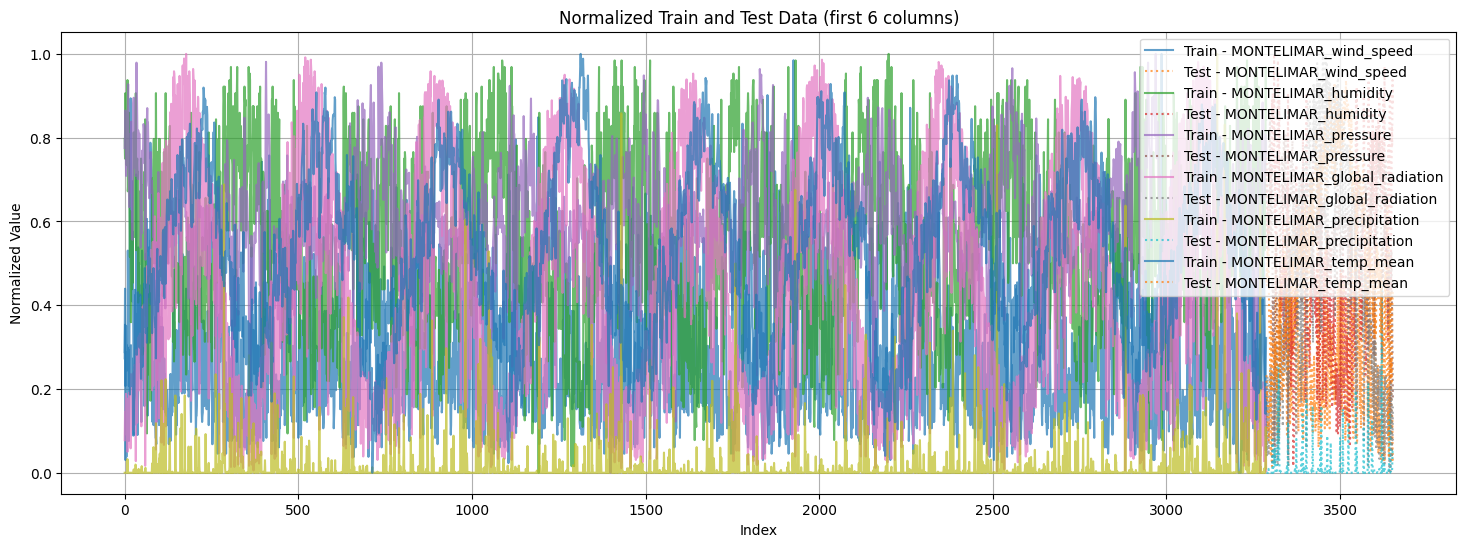

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1️⃣ انتخاب فقط ستون‌های عددی (به جز ستون تاریخ و MONTH)
numerical_cols = df_train.select_dtypes(include=["number"]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ["MONTH"]]

# 2️⃣ نرمال‌سازی فقط روی داده‌های آموزش
scaler = MinMaxScaler()
df_train_scaled = df_train.copy()
df_train_scaled[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])

# 3️⃣ استفاده از همان پارامترها برای نرمال‌سازی داده‌های تست
df_test_scaled = df_test.copy()
df_test_scaled[numerical_cols] = scaler.transform(df_test[numerical_cols])

# 4️⃣ نمایش چند ردیف برای بررسی
print("✅ Train Scaled (head):")
print(df_train_scaled.head())

print("\n✅ Test Scaled (head):")
print(df_test_scaled.head())

# 5️⃣ نمودار مقایسه‌ای (فقط 6 ستون اول برای وضوح)
plt.figure(figsize=(18, 6))
for col in numerical_cols[:6]:
    plt.plot(df_train_scaled.index, df_train_scaled[col], label=f"Train - {col}", alpha=0.7)
    plt.plot(df_test_scaled.index, df_test_scaled[col], label=f"Test - {col}", linestyle='dotted', alpha=0.7)

plt.title('Normalized Train and Test Data (first 6 columns)')
plt.xlabel('Index')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid()
plt.show()


###2.1.4 ادامه

In [ ]:
import numpy as np

def generate_sequence_windows(dataframe, window_length=5, step=1):
    """
    تبدیل داده‌ها به توالی‌های متوالی (پنجره‌های لغزشی).

    پارامترها:
    - dataframe: pd.DataFrame، داده‌های عددی سری زمانی
    - window_length: int، طول پنجره (تعداد گام‌های زمانی)
    - step: int، فاصله بین هر پنجره (stride)

    خروجی:
    - np.ndarray با شکل (تعداد توالی‌ها, طول پنجره, تعداد ویژگی‌ها)
    """
    data = dataframe.select_dtypes(include=[np.number]).to_numpy()
    total_rows, num_features = data.shape

    # تعداد پنجره‌های معتبر
    num_windows = (total_rows - window_length) // step + 1

    # استفاده از sliding_window_view از numpy برای ساخت پنجره‌ها
    windows = np.lib.stride_tricks.sliding_window_view(data, (window_length, num_features))

    # reshape پنجره‌ها
    sequence_array = windows.reshape(-1, window_length, num_features)

    # اعمال stride (فاصله پنجره‌ها)
    return sequence_array[::step]


In [ ]:
# Creating sliding sequences for training and testing
train_sequences = generate_sequence_windows(df_train_scaled, window_length=5, step=1)
test_sequences = generate_sequence_windows(df_test_scaled, window_length=5, step=1)

# Target values start from the end of each input sequence (index 4 corresponds to window_length - 1)
train_targets = df_train_scaled.iloc[4:].copy()
test_targets = df_test_scaled.iloc[4:].copy()

# Display shapes for verification
print(train_targets.shape)
print(train_sequences.shape)
print(test_sequences.shape)
print(test_targets.shape)


(3284, 27)
(3284, 5, 26)
(361, 5, 26)
(361, 27)


##2.3

Using device: cpu

Training with learning rate = 1


LR=1 Training Progress: 100%|██████████| 200/200 [00:01<00:00, 111.94it/s]


Epoch [1/200] - Train Loss: 0.854326 - Test Loss: 444561.281250
Epoch [2/200] - Train Loss: 444186.843750 - Test Loss: 3604329.000000
Epoch [3/200] - Train Loss: 3621869.500000 - Test Loss: 6513893.000000
Epoch [4/200] - Train Loss: 6513903.500000 - Test Loss: 6513915.500000
Epoch [5/200] - Train Loss: 6513904.500000 - Test Loss: 6513895.000000
Epoch [6/200] - Train Loss: 6513906.500000 - Test Loss: 6513918.000000
Epoch [7/200] - Train Loss: 6513907.000000 - Test Loss: 6513898.000000
Epoch [8/200] - Train Loss: 6513908.500000 - Test Loss: 6513923.000000
Epoch [9/200] - Train Loss: 6513911.500000 - Test Loss: 6513900.000000
Epoch [10/200] - Train Loss: 6513911.000000 - Test Loss: 6513923.000000
Epoch [11/200] - Train Loss: 6513911.500000 - Test Loss: 6513900.000000
Epoch [12/200] - Train Loss: 6513911.000000 - Test Loss: 6513923.000000
Epoch [13/200] - Train Loss: 6513911.500000 - Test Loss: 6513900.000000
Epoch [14/200] - Train Loss: 6513911.000000 - Test Loss: 6513923.000000
Epoch [15

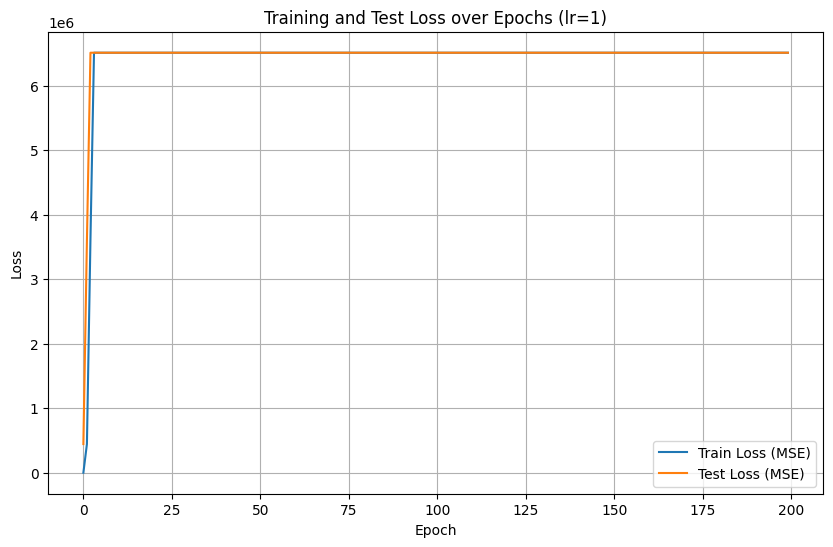


Training with learning rate = 0.001


LR=0.001 Training Progress: 100%|██████████| 200/200 [00:01<00:00, 153.89it/s]


Epoch [1/200] - Train Loss: 1.472663 - Test Loss: 1.141923
Epoch [2/200] - Train Loss: 1.108578 - Test Loss: 0.883597
Epoch [3/200] - Train Loss: 0.855795 - Test Loss: 0.695212
Epoch [4/200] - Train Loss: 0.672349 - Test Loss: 0.553995
Epoch [5/200] - Train Loss: 0.535419 - Test Loss: 0.446721
Epoch [6/200] - Train Loss: 0.431765 - Test Loss: 0.364508
Epoch [7/200] - Train Loss: 0.352580 - Test Loss: 0.301135
Epoch [8/200] - Train Loss: 0.291762 - Test Loss: 0.252088
Epoch [9/200] - Train Loss: 0.245017 - Test Loss: 0.214081
Epoch [10/200] - Train Loss: 0.209008 - Test Loss: 0.184635
Epoch [11/200] - Train Loss: 0.181255 - Test Loss: 0.161746
Epoch [12/200] - Train Loss: 0.159823 - Test Loss: 0.143916
Epoch [13/200] - Train Loss: 0.143240 - Test Loss: 0.129987
Epoch [14/200] - Train Loss: 0.130378 - Test Loss: 0.119050
Epoch [15/200] - Train Loss: 0.120353 - Test Loss: 0.110393
Epoch [16/200] - Train Loss: 0.112497 - Test Loss: 0.103495
Epoch [17/200] - Train Loss: 0.106300 - Test Loss

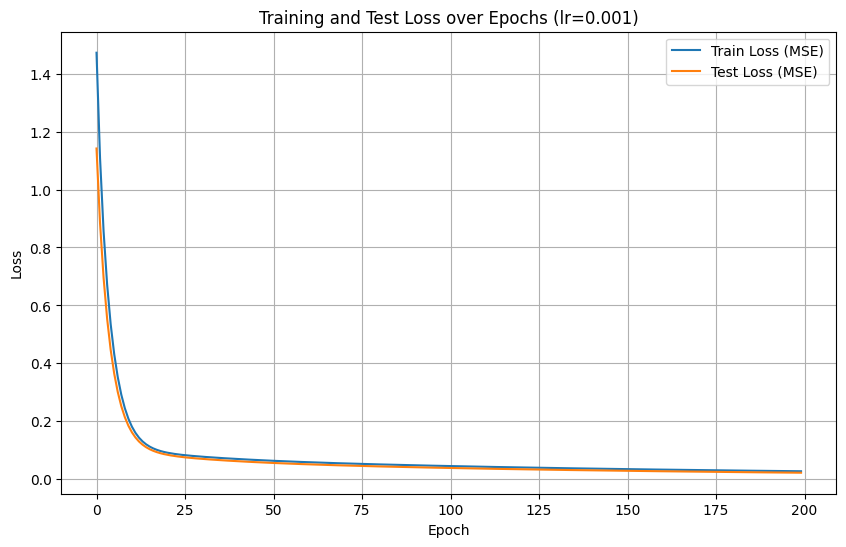


Training with learning rate = 1e-08


LR=1e-08 Training Progress: 100%|██████████| 200/200 [00:01<00:00, 164.41it/s]


Epoch [1/200] - Train Loss: 0.825026 - Test Loss: 0.835343
Epoch [2/200] - Train Loss: 0.825024 - Test Loss: 0.835341
Epoch [3/200] - Train Loss: 0.825022 - Test Loss: 0.835339
Epoch [4/200] - Train Loss: 0.825020 - Test Loss: 0.835337
Epoch [5/200] - Train Loss: 0.825018 - Test Loss: 0.835335
Epoch [6/200] - Train Loss: 0.825017 - Test Loss: 0.835334
Epoch [7/200] - Train Loss: 0.825015 - Test Loss: 0.835332
Epoch [8/200] - Train Loss: 0.825013 - Test Loss: 0.835330
Epoch [9/200] - Train Loss: 0.825011 - Test Loss: 0.835328
Epoch [10/200] - Train Loss: 0.825009 - Test Loss: 0.835326
Epoch [11/200] - Train Loss: 0.825007 - Test Loss: 0.835324
Epoch [12/200] - Train Loss: 0.825005 - Test Loss: 0.835322
Epoch [13/200] - Train Loss: 0.825004 - Test Loss: 0.835320
Epoch [14/200] - Train Loss: 0.825002 - Test Loss: 0.835319
Epoch [15/200] - Train Loss: 0.825000 - Test Loss: 0.835317
Epoch [16/200] - Train Loss: 0.824998 - Test Loss: 0.835315
Epoch [17/200] - Train Loss: 0.824996 - Test Loss

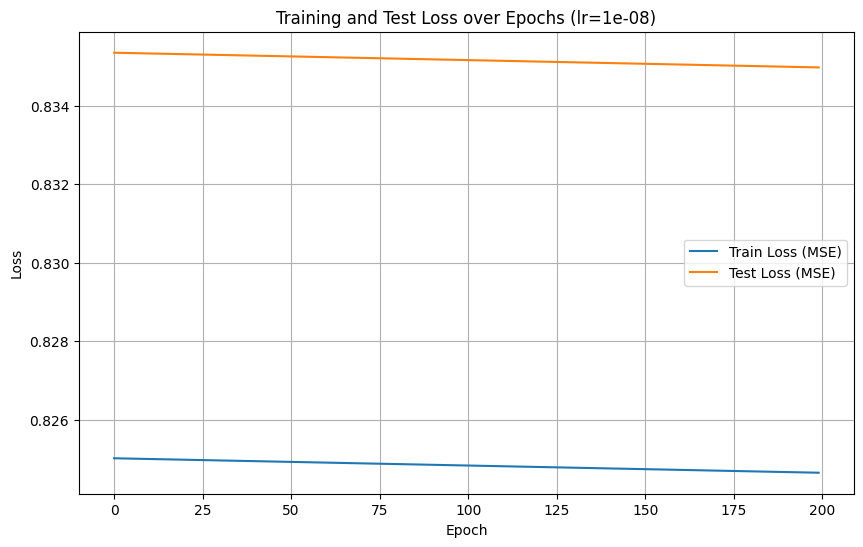

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

target_col = "TOURS_temp_next"

num_train_samples = train_sequences.shape[0]
num_test_samples = test_sequences.shape[0]

y_train_values = train_targets[target_col].values[:num_train_samples]
y_test_values = test_targets[target_col].values[:num_test_samples]

X_train = torch.tensor(train_sequences, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train_values, dtype=torch.float32).unsqueeze(1).to(device)

X_test = torch.tensor(test_sequences, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test_values, dtype=torch.float32).unsqueeze(1).to(device)

input_size = X_train.shape[1] * X_train.shape[2]
hidden_size = 64
output_size = 1
num_epochs = 200

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.flatten(x)
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

learning_rates = [1, 0.001, 1e-8]

for lr in learning_rates:
    print(f"\nTraining with learning rate = {lr}")
    model = SimpleNN(input_size, hidden_size, output_size).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    train_losses = []
    test_losses = []

    for epoch in tqdm(range(num_epochs), desc=f"LR={lr} Training Progress"):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test).item()
            test_losses.append(test_loss)

    for epoch in range(num_epochs):
        print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_losses[epoch]:.6f} - Test Loss: {test_losses[epoch]:.6f}")

    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Train Loss (MSE)')
    plt.plot(test_losses, label='Test Loss (MSE)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Test Loss over Epochs (lr={lr})')
    plt.legend()
    plt.grid()
    plt.show()


##2.4

###2.4.1


Training with learning rate = 1


LR=1 Training Progress: 100%|██████████| 200/200 [00:01<00:00, 164.28it/s]



Training with learning rate = 0.001


LR=0.001 Training Progress: 100%|██████████| 200/200 [00:01<00:00, 159.84it/s]



Training with learning rate = 1e-08


LR=1e-08 Training Progress: 100%|██████████| 200/200 [00:01<00:00, 141.77it/s]


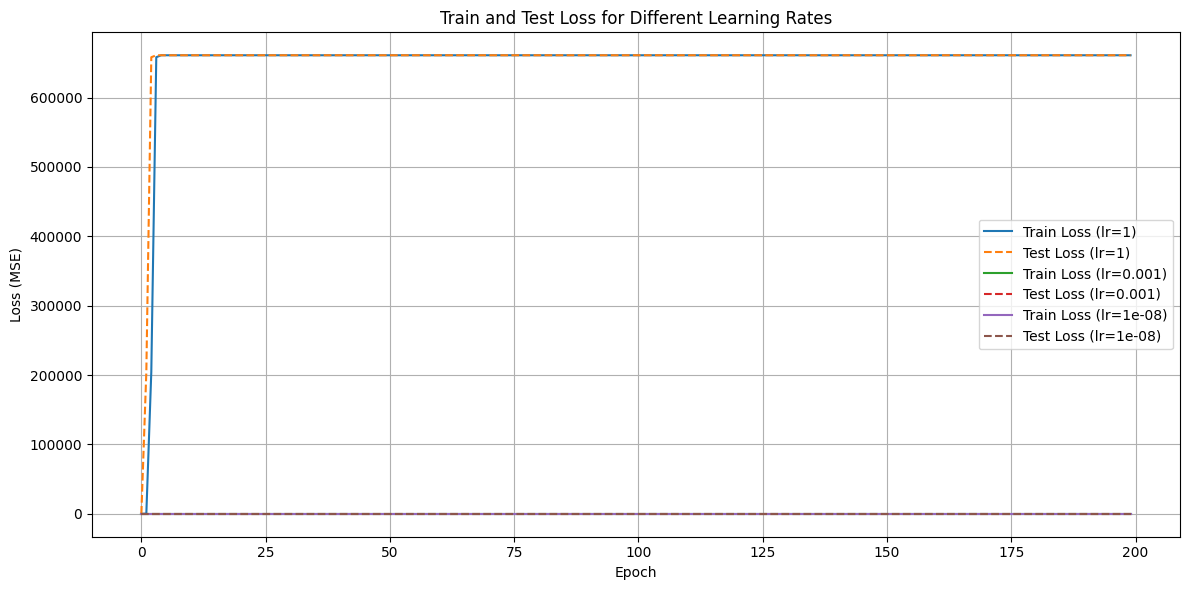


==================== Summary of Results ====================
Learning Rate  Final Train Loss    Final Test Loss     Min Train Loss      Min Test Loss       
-----------------------------------------------------------------------------------------------
1              660940.250000       660936.687500       0.071377            142.914948          
0.001          0.025218            0.020699            0.025218            0.020699            
1e-08          0.464749            0.474256            0.464749            0.474256            


In [ ]:
 # دیکشنری برای ذخیره‌ی لیست خطاها برای هر نرخ یادگیری
all_train_losses = {}
all_test_losses = {}

# حلقه آموزش برای نرخ‌های یادگیری مختلف
for lr in learning_rates:
    print(f"\nTraining with learning rate = {lr}")
    model = SimpleNN(input_size, hidden_size, output_size).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    train_losses = []
    test_losses = []

    for epoch in tqdm(range(num_epochs), desc=f"LR={lr} Training Progress"):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test).item()
            test_losses.append(test_loss)

    # ذخیره لیست خطاها برای هر lr
    all_train_losses[lr] = train_losses
    all_test_losses[lr] = test_losses

# ✅ رسم نمودار خطا برای تمامی نرخ‌های یادگیری در یک نمودار
plt.figure(figsize=(12, 6))

for lr in learning_rates:
    plt.plot(all_train_losses[lr], label=f'Train Loss (lr={lr})', linestyle='-')
    plt.plot(all_test_losses[lr], label=f'Test Loss (lr={lr})', linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Train and Test Loss for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# تحلیل عددی خروجی‌ها برای هر نرخ یادگیری
print("\n==================== Summary of Results ====================")
print(f"{'Learning Rate':<15}{'Final Train Loss':<20}{'Final Test Loss':<20}{'Min Train Loss':<20}{'Min Test Loss':<20}")
print("-" * 95)

for lr in learning_rates:
    train_loss_list = all_train_losses[lr]
    test_loss_list = all_test_losses[lr]

    final_train_loss = train_loss_list[-1]
    final_test_loss = test_loss_list[-1]
    min_train_loss = min(train_loss_list)
    min_test_loss = min(test_loss_list)

    print(f"{str(lr):<15}{final_train_loss:<20.6f}{final_test_loss:<20.6f}{min_train_loss:<20.6f}{min_test_loss:<20.6f}")

##2.5

Using device: cpu

Training SimpleNN with learning rate = 1


LR=1 Training Progress:   6%|▋         | 13/200 [00:00<00:01, 123.61it/s]

Epoch [1/200] - Train Loss: 0.072816 - Test Loss: 10.586148
Epoch [10/200] - Train Loss: 11183151.000000 - Test Loss: 11183136.000000
Epoch [20/200] - Train Loss: 11183151.000000 - Test Loss: 11183136.000000


LR=1 Training Progress:  18%|█▊        | 37/200 [00:00<00:01, 105.41it/s]

Epoch [30/200] - Train Loss: 11183151.000000 - Test Loss: 11183136.000000
Epoch [40/200] - Train Loss: 11183151.000000 - Test Loss: 11183136.000000


LR=1 Training Progress:  24%|██▍       | 49/200 [00:00<00:01, 109.19it/s]

Epoch [50/200] - Train Loss: 11183151.000000 - Test Loss: 11183136.000000


LR=1 Training Progress:  30%|███       | 61/200 [00:00<00:01, 110.41it/s]

Epoch [60/200] - Train Loss: 11183151.000000 - Test Loss: 11183136.000000
Epoch [70/200] - Train Loss: 11183151.000000 - Test Loss: 11183136.000000


LR=1 Training Progress:  37%|███▋      | 74/200 [00:00<00:01, 113.56it/s]

Epoch [80/200] - Train Loss: 11183151.000000 - Test Loss: 11183136.000000


LR=1 Training Progress:  49%|████▉     | 98/200 [00:00<00:00, 114.62it/s]

Epoch [90/200] - Train Loss: 11183151.000000 - Test Loss: 11183136.000000
Epoch [100/200] - Train Loss: 11183151.000000 - Test Loss: 11183136.000000


LR=1 Training Progress:  55%|█████▌    | 110/200 [00:00<00:00, 109.93it/s]

Epoch [110/200] - Train Loss: 11183151.000000 - Test Loss: 11183136.000000


LR=1 Training Progress:  61%|██████    | 122/200 [00:01<00:00, 103.18it/s]

Epoch [120/200] - Train Loss: 11183151.000000 - Test Loss: 11183136.000000


LR=1 Training Progress:  66%|██████▋   | 133/200 [00:01<00:00, 101.56it/s]

Epoch [130/200] - Train Loss: 11183151.000000 - Test Loss: 11183136.000000


LR=1 Training Progress:  72%|███████▏  | 144/200 [00:01<00:00, 96.84it/s] 

Epoch [140/200] - Train Loss: 11183151.000000 - Test Loss: 11183136.000000


LR=1 Training Progress:  77%|███████▋  | 154/200 [00:01<00:00, 96.22it/s]

Epoch [150/200] - Train Loss: 11183151.000000 - Test Loss: 11183136.000000


LR=1 Training Progress:  82%|████████▏ | 164/200 [00:01<00:00, 92.89it/s]

Epoch [160/200] - Train Loss: 11183151.000000 - Test Loss: 11183136.000000


LR=1 Training Progress:  87%|████████▋ | 174/200 [00:01<00:00, 92.14it/s]

Epoch [170/200] - Train Loss: 11183151.000000 - Test Loss: 11183136.000000


LR=1 Training Progress:  92%|█████████▏| 184/200 [00:01<00:00, 90.34it/s]

Epoch [180/200] - Train Loss: 11183151.000000 - Test Loss: 11183136.000000


LR=1 Training Progress:  97%|█████████▋| 194/200 [00:01<00:00, 90.27it/s]

Epoch [190/200] - Train Loss: 11183151.000000 - Test Loss: 11183136.000000


LR=1 Training Progress: 100%|██████████| 200/200 [00:01<00:00, 100.32it/s]


Epoch [200/200] - Train Loss: 11183151.000000 - Test Loss: 11183136.000000


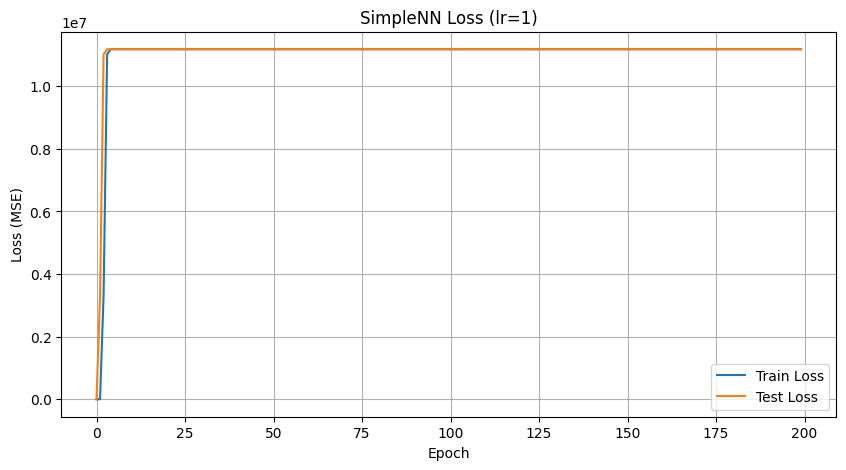


Training SimpleNN with learning rate = 0.001


LR=0.001 Training Progress:   8%|▊         | 17/200 [00:00<00:01, 162.64it/s]

Epoch [1/200] - Train Loss: 0.297478 - Test Loss: 0.240071
Epoch [10/200] - Train Loss: 0.079525 - Test Loss: 0.071669
Epoch [20/200] - Train Loss: 0.061509 - Test Loss: 0.055961
Epoch [30/200] - Train Loss: 0.057511 - Test Loss: 0.051997


LR=0.001 Training Progress:  33%|███▎      | 66/200 [00:00<00:00, 151.68it/s]

Epoch [40/200] - Train Loss: 0.054579 - Test Loss: 0.049190
Epoch [50/200] - Train Loss: 0.051990 - Test Loss: 0.046756
Epoch [60/200] - Train Loss: 0.049636 - Test Loss: 0.044550
Epoch [70/200] - Train Loss: 0.047456 - Test Loss: 0.042510


LR=0.001 Training Progress:  49%|████▉     | 98/200 [00:00<00:00, 153.29it/s]

Epoch [80/200] - Train Loss: 0.045424 - Test Loss: 0.040613
Epoch [90/200] - Train Loss: 0.043525 - Test Loss: 0.038843
Epoch [100/200] - Train Loss: 0.041743 - Test Loss: 0.037188
Epoch [110/200] - Train Loss: 0.040067 - Test Loss: 0.035633


LR=0.001 Training Progress:  74%|███████▎  | 147/200 [00:00<00:00, 158.93it/s]

Epoch [120/200] - Train Loss: 0.038488 - Test Loss: 0.034171
Epoch [130/200] - Train Loss: 0.036998 - Test Loss: 0.032793
Epoch [140/200] - Train Loss: 0.035590 - Test Loss: 0.031491
Epoch [150/200] - Train Loss: 0.034256 - Test Loss: 0.030259


LR=0.001 Training Progress:  90%|█████████ | 181/200 [00:01<00:00, 164.45it/s]

Epoch [160/200] - Train Loss: 0.032991 - Test Loss: 0.029092
Epoch [170/200] - Train Loss: 0.031788 - Test Loss: 0.027982
Epoch [180/200] - Train Loss: 0.030641 - Test Loss: 0.026921
Epoch [190/200] - Train Loss: 0.029543 - Test Loss: 0.025909


LR=0.001 Training Progress: 100%|██████████| 200/200 [00:01<00:00, 155.28it/s]


Epoch [200/200] - Train Loss: 0.028491 - Test Loss: 0.024948


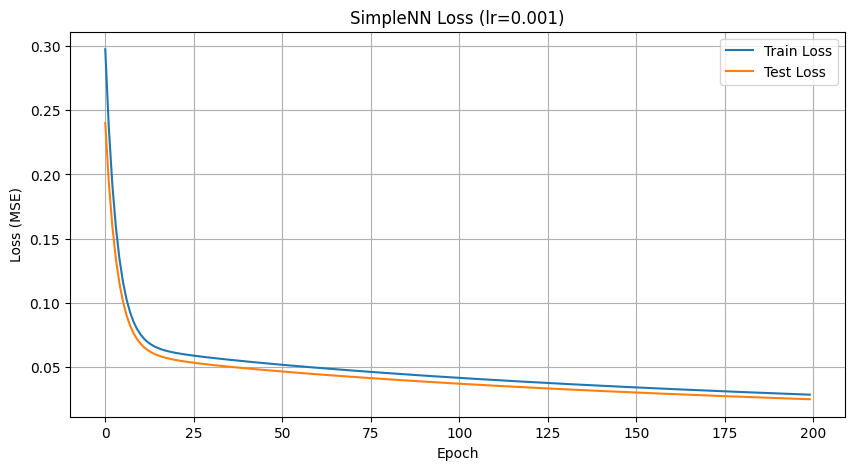


Training SimpleNN with learning rate = 1e-08


LR=1e-08 Training Progress:   8%|▊         | 15/200 [00:00<00:01, 140.69it/s]

Epoch [1/200] - Train Loss: 0.030354 - Test Loss: 0.026912
Epoch [10/200] - Train Loss: 0.030354 - Test Loss: 0.026912
Epoch [20/200] - Train Loss: 0.030354 - Test Loss: 0.026912


LR=1e-08 Training Progress:  15%|█▌        | 30/200 [00:00<00:01, 143.16it/s]

Epoch [30/200] - Train Loss: 0.030354 - Test Loss: 0.026912


LR=1e-08 Training Progress:  22%|██▎       | 45/200 [00:00<00:01, 146.00it/s]

Epoch [40/200] - Train Loss: 0.030354 - Test Loss: 0.026912
Epoch [50/200] - Train Loss: 0.030354 - Test Loss: 0.026912
Epoch [60/200] - Train Loss: 0.030354 - Test Loss: 0.026912


LR=1e-08 Training Progress:  31%|███       | 62/200 [00:00<00:00, 153.13it/s]

Epoch [70/200] - Train Loss: 0.030354 - Test Loss: 0.026912


LR=1e-08 Training Progress:  48%|████▊     | 96/200 [00:00<00:00, 161.96it/s]

Epoch [80/200] - Train Loss: 0.030354 - Test Loss: 0.026912
Epoch [90/200] - Train Loss: 0.030354 - Test Loss: 0.026912
Epoch [100/200] - Train Loss: 0.030354 - Test Loss: 0.026912


LR=1e-08 Training Progress:  56%|█████▋    | 113/200 [00:00<00:00, 162.31it/s]

Epoch [110/200] - Train Loss: 0.030354 - Test Loss: 0.026912


LR=1e-08 Training Progress:  65%|██████▌   | 130/200 [00:00<00:00, 151.38it/s]

Epoch [120/200] - Train Loss: 0.030354 - Test Loss: 0.026912
Epoch [130/200] - Train Loss: 0.030353 - Test Loss: 0.026912


LR=1e-08 Training Progress:  73%|███████▎  | 146/200 [00:00<00:00, 153.70it/s]

Epoch [140/200] - Train Loss: 0.030353 - Test Loss: 0.026912


LR=1e-08 Training Progress:  81%|████████  | 162/200 [00:01<00:00, 154.86it/s]

Epoch [150/200] - Train Loss: 0.030353 - Test Loss: 0.026912
Epoch [160/200] - Train Loss: 0.030353 - Test Loss: 0.026912
Epoch [170/200] - Train Loss: 0.030353 - Test Loss: 0.026912


LR=1e-08 Training Progress:  90%|████████▉ | 179/200 [00:01<00:00, 157.03it/s]

Epoch [180/200] - Train Loss: 0.030353 - Test Loss: 0.026912


LR=1e-08 Training Progress: 100%|██████████| 200/200 [00:01<00:00, 155.16it/s]


Epoch [190/200] - Train Loss: 0.030353 - Test Loss: 0.026912
Epoch [200/200] - Train Loss: 0.030353 - Test Loss: 0.026912


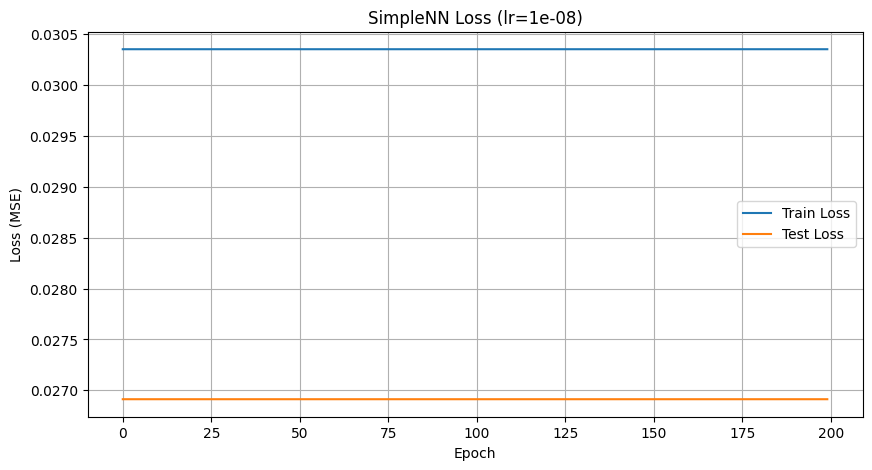

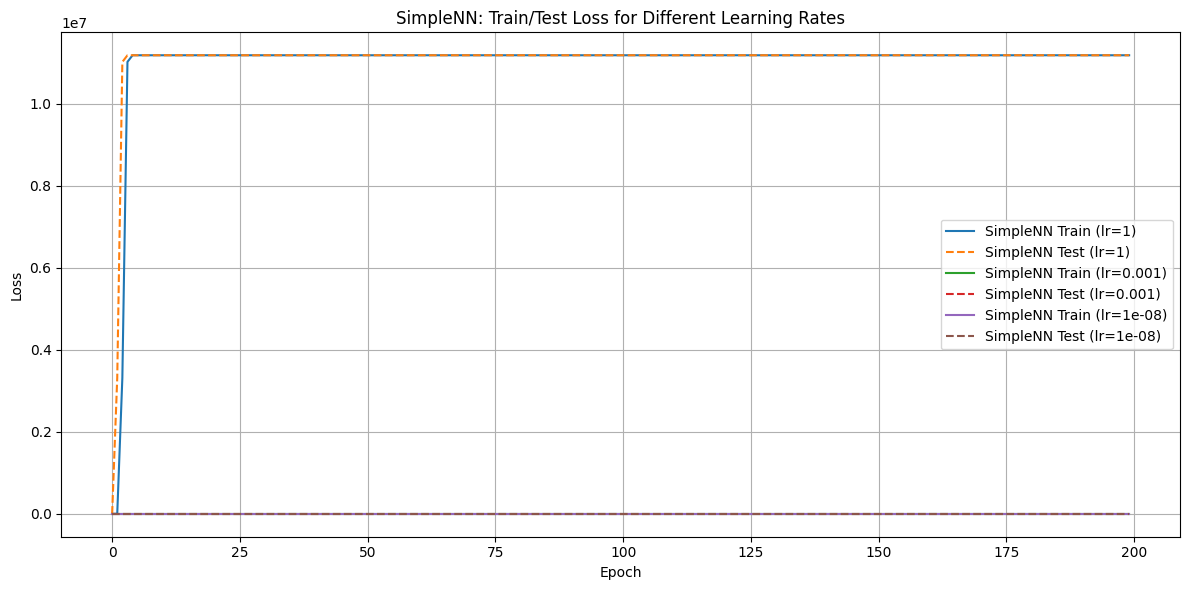


Training DeeperNN with learning rate = 0.001


Training DeeperNN:   3%|▎         | 6/200 [00:00<00:04, 48.31it/s]

Epoch [1/200] - Train Loss: 0.086415 - Test Loss: 0.087638
Epoch [10/200] - Train Loss: 0.080170 - Test Loss: 0.081245


Training DeeperNN:   8%|▊         | 17/200 [00:00<00:03, 52.30it/s]

Epoch [20/200] - Train Loss: 0.074527 - Test Loss: 0.074768


Training DeeperNN:  14%|█▍        | 29/200 [00:00<00:03, 53.71it/s]

Epoch [30/200] - Train Loss: 0.069368 - Test Loss: 0.068939


Training DeeperNN:  20%|██        | 41/200 [00:00<00:02, 55.54it/s]

Epoch [40/200] - Train Loss: 0.064554 - Test Loss: 0.063707


Training DeeperNN:  24%|██▎       | 47/200 [00:00<00:02, 56.44it/s]

Epoch [50/200] - Train Loss: 0.060545 - Test Loss: 0.059020


Training DeeperNN:  30%|██▉       | 59/200 [00:01<00:02, 55.52it/s]

Epoch [60/200] - Train Loss: 0.056478 - Test Loss: 0.054845


Training DeeperNN:  32%|███▎      | 65/200 [00:01<00:02, 52.43it/s]

Epoch [70/200] - Train Loss: 0.053114 - Test Loss: 0.051151


Training DeeperNN:  38%|███▊      | 77/200 [00:01<00:02, 53.82it/s]

Epoch [80/200] - Train Loss: 0.050303 - Test Loss: 0.047899


Training DeeperNN:  44%|████▍     | 89/200 [00:01<00:02, 53.55it/s]

Epoch [90/200] - Train Loss: 0.047941 - Test Loss: 0.045040


Training DeeperNN:  50%|█████     | 101/200 [00:01<00:01, 54.90it/s]

Epoch [100/200] - Train Loss: 0.045350 - Test Loss: 0.042554


Training DeeperNN:  54%|█████▎    | 107/200 [00:01<00:01, 54.88it/s]

Epoch [110/200] - Train Loss: 0.043746 - Test Loss: 0.040394


Training DeeperNN:  60%|█████▉    | 119/200 [00:02<00:01, 54.57it/s]

Epoch [120/200] - Train Loss: 0.042084 - Test Loss: 0.038512


Training DeeperNN:  66%|██████▌   | 131/200 [00:02<00:01, 54.24it/s]

Epoch [130/200] - Train Loss: 0.040493 - Test Loss: 0.036887


Training DeeperNN:  68%|██████▊   | 137/200 [00:02<00:01, 54.74it/s]

Epoch [140/200] - Train Loss: 0.039366 - Test Loss: 0.035484


Training DeeperNN:  74%|███████▍  | 149/200 [00:02<00:00, 54.93it/s]

Epoch [150/200] - Train Loss: 0.038205 - Test Loss: 0.034275


Training DeeperNN:  80%|████████  | 161/200 [00:02<00:00, 55.71it/s]

Epoch [160/200] - Train Loss: 0.037812 - Test Loss: 0.033242


Training DeeperNN:  84%|████████▎ | 167/200 [00:03<00:00, 56.25it/s]

Epoch [170/200] - Train Loss: 0.036160 - Test Loss: 0.032349


Training DeeperNN:  90%|████████▉ | 179/200 [00:03<00:00, 53.94it/s]

Epoch [180/200] - Train Loss: 0.036001 - Test Loss: 0.031586


Training DeeperNN:  96%|█████████▌| 191/200 [00:03<00:00, 53.97it/s]

Epoch [190/200] - Train Loss: 0.035369 - Test Loss: 0.030923


Training DeeperNN: 100%|██████████| 200/200 [00:03<00:00, 54.18it/s]

Epoch [200/200] - Train Loss: 0.035024 - Test Loss: 0.030347


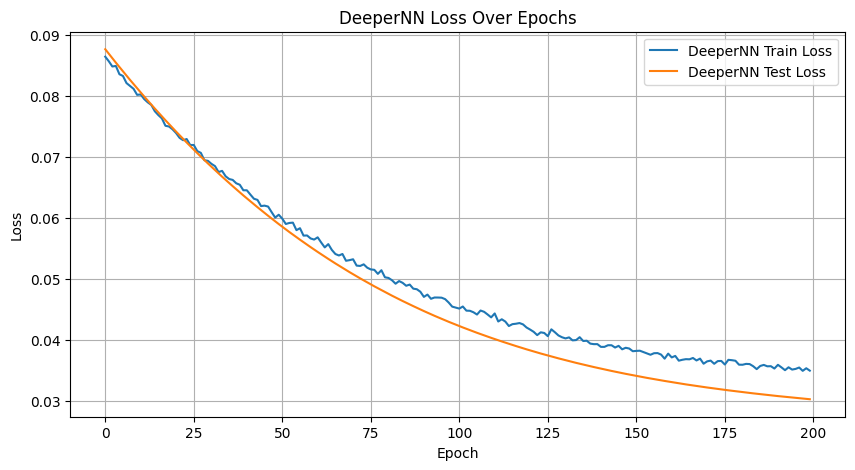

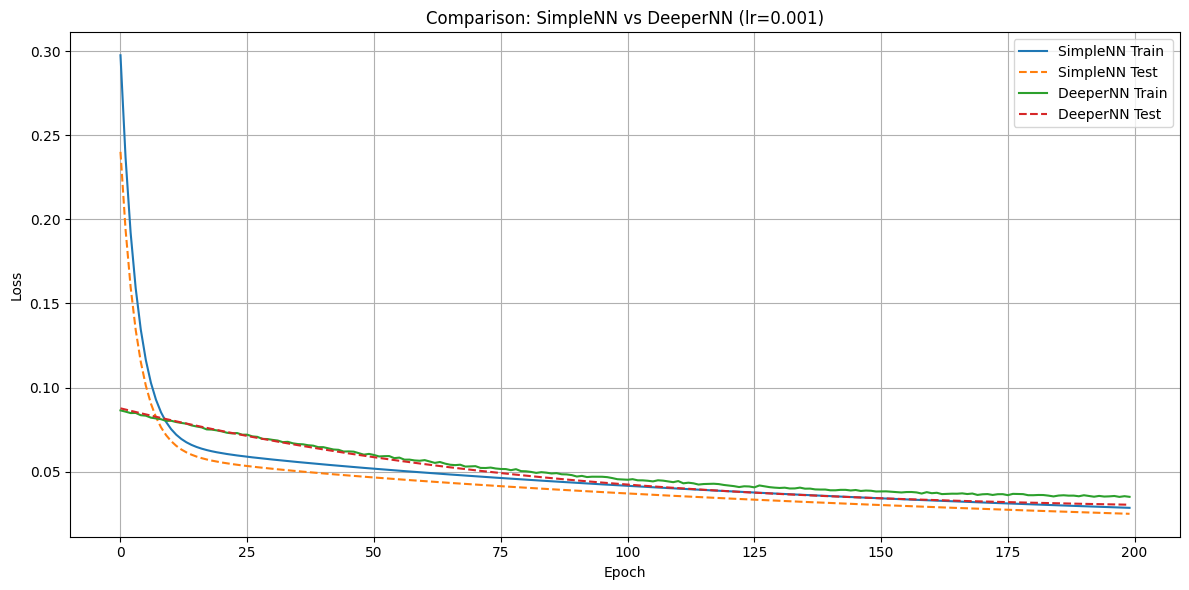


=========== Comparison Table ===========
Model          Final Train    Final Test     Min Train      Min Test       
----------------------------------------------------------------------
SimpleNN       0.028491       0.024948       0.028491       0.024948       
DeeperNN       0.035024       0.030347       0.034994       0.030347       


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt

# فرض بر این است که X_train, X_test, y_train, y_test از قبل تعریف شده‌اند
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

input_size = X_train.shape[1] * X_train.shape[2]
hidden_size = 64
output_size = 1
num_epochs = 200

# مدل ساده
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.flatten(x)
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

# مدل عمیق‌تر
class DeeperNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(DeeperNN, self).__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, output_size)
        )

    def forward(self, x):
        return self.net(x)

# =================== آموزش مدل ساده با چند learning rate =================== #
learning_rates = [1, 0.001, 1e-8]
all_train_losses = {}
all_test_losses = {}

for lr in learning_rates:
    print(f"\nTraining SimpleNN with learning rate = {lr}")
    model = SimpleNN(input_size, hidden_size, output_size).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    train_losses = []
    test_losses = []

    for epoch in tqdm(range(num_epochs), desc=f"LR={lr} Training Progress"):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test).item()
            test_losses.append(test_loss)

        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {loss.item():.6f} - Test Loss: {test_loss:.6f}")

    all_train_losses[lr] = train_losses
    all_test_losses[lr] = test_losses

    # نمودار جداگانه برای هر lr
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.title(f'SimpleNN Loss (lr={lr})')
    plt.legend()
    plt.grid(True)
    plt.show()

# نمودار ترکیبی مدل ساده با همه lr ها
plt.figure(figsize=(12, 6))
for lr in learning_rates:
    plt.plot(all_train_losses[lr], label=f'SimpleNN Train (lr={lr})', linestyle='-')
    plt.plot(all_test_losses[lr], label=f'SimpleNN Test (lr={lr})', linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('SimpleNN: Train/Test Loss for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# =================== آموزش مدل عمیق‌تر (با lr=0.001) =================== #
print("\nTraining DeeperNN with learning rate = 0.001")
model_deep = DeeperNN(input_size, output_size).to(device)
criterion = nn.MSELoss()
optimizer = optim.SGD(model_deep.parameters(), lr=0.001)

train_losses_deep = []
test_losses_deep = []

for epoch in tqdm(range(num_epochs), desc="Training DeeperNN"):
    model_deep.train()
    optimizer.zero_grad()
    output = model_deep(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    train_losses_deep.append(loss.item())

    model_deep.eval()
    with torch.no_grad():
        test_output = model_deep(X_test)
        test_loss = criterion(test_output, y_test).item()
        test_losses_deep.append(test_loss)

    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {loss.item():.6f} - Test Loss: {test_loss:.6f}")

# نمودار مدل عمیق
plt.figure(figsize=(10, 5))
plt.plot(train_losses_deep, label='DeeperNN Train Loss')
plt.plot(test_losses_deep, label='DeeperNN Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('DeeperNN Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# =================== مقایسه نهایی: SimpleNN vs DeeperNN =================== #
simple_lr = 0.001
simple_train = all_train_losses[simple_lr]
simple_test = all_test_losses[simple_lr]

plt.figure(figsize=(12, 6))
plt.plot(simple_train, label='SimpleNN Train', linestyle='-')
plt.plot(simple_test, label='SimpleNN Test', linestyle='--')
plt.plot(train_losses_deep, label='DeeperNN Train', linestyle='-')
plt.plot(test_losses_deep, label='DeeperNN Test', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Comparison: SimpleNN vs DeeperNN (lr=0.001)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# جدول نهایی
print("\n=========== Comparison Table ===========")
print(f"{'Model':<15}{'Final Train':<15}{'Final Test':<15}{'Min Train':<15}{'Min Test':<15}")
print("-" * 70)
print(f"{'SimpleNN':<15}{simple_train[-1]:<15.6f}{simple_test[-1]:<15.6f}{min(simple_train):<15.6f}{min(simple_test):<15.6f}")
print(f"{'DeeperNN':<15}{train_losses_deep[-1]:<15.6f}{test_losses_deep[-1]:<15.6f}{min(train_losses_deep):<15.6f}{min(test_losses_deep):<15.6f}")


##2.6

In [ ]:
# دیکشنری برای ذخیره وزن‌ها در طول آموزش برای هر نرخ یادگیری
weights_history = {}

for lr in learning_rates:
    print(f"\nTraining with learning rate = {lr}")
    model = SimpleNN(input_size, hidden_size, output_size).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    train_losses = []
    test_losses = []
    weight_snapshots = []

    for epoch in tqdm(range(num_epochs), desc=f"LR={lr} Training Progress"):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test).item()
            test_losses.append(test_loss)

            # ذخیره وزن‌ها (فقط لایه‌ی hidden)
            hidden_weights = model.hidden.weight.detach().cpu().clone().numpy()
            weight_snapshots.append(hidden_weights)

        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {loss.item():.6f} - Test Loss: {test_loss:.6f}")

    # ذخیره وزن‌ها و خطاها
    all_train_losses[lr] = train_losses
    all_test_losses[lr] = test_losses
    weights_history[lr] = weight_snapshots



Training with learning rate = 1


LR=1 Training Progress:  10%|▉         | 19/200 [00:00<00:00, 182.67it/s]

Epoch [1/200] - Train Loss: 0.068072 - Test Loss: 1503.990601
Epoch [10/200] - Train Loss: 6452.243164 - Test Loss: 6452.595703
Epoch [20/200] - Train Loss: 6452.257812 - Test Loss: 6452.610352
Epoch [30/200] - Train Loss: 6452.257812 - Test Loss: 6452.610352


LR=1 Training Progress:  38%|███▊      | 76/200 [00:00<00:00, 183.93it/s]

Epoch [40/200] - Train Loss: 6452.257812 - Test Loss: 6452.610352
Epoch [50/200] - Train Loss: 6452.257812 - Test Loss: 6452.610352
Epoch [60/200] - Train Loss: 6452.257812 - Test Loss: 6452.610352
Epoch [70/200] - Train Loss: 6452.257812 - Test Loss: 6452.610352


LR=1 Training Progress:  56%|█████▋    | 113/200 [00:00<00:00, 177.11it/s]

Epoch [80/200] - Train Loss: 6452.257812 - Test Loss: 6452.610352
Epoch [90/200] - Train Loss: 6452.257812 - Test Loss: 6452.610352
Epoch [100/200] - Train Loss: 6452.257812 - Test Loss: 6452.610352
Epoch [110/200] - Train Loss: 6452.257812 - Test Loss: 6452.610352


LR=1 Training Progress:  74%|███████▍  | 149/200 [00:00<00:00, 167.75it/s]

Epoch [120/200] - Train Loss: 6452.257812 - Test Loss: 6452.610352
Epoch [130/200] - Train Loss: 6452.257812 - Test Loss: 6452.610352
Epoch [140/200] - Train Loss: 6452.257812 - Test Loss: 6452.610352
Epoch [150/200] - Train Loss: 6452.257812 - Test Loss: 6452.610352


LR=1 Training Progress:  92%|█████████▎| 185/200 [00:01<00:00, 173.15it/s]

Epoch [160/200] - Train Loss: 6452.257812 - Test Loss: 6452.610352
Epoch [170/200] - Train Loss: 6452.257812 - Test Loss: 6452.610352
Epoch [180/200] - Train Loss: 6452.257812 - Test Loss: 6452.610352
Epoch [190/200] - Train Loss: 6452.257812 - Test Loss: 6452.610352


LR=1 Training Progress: 100%|██████████| 200/200 [00:01<00:00, 174.39it/s]


Epoch [200/200] - Train Loss: 6452.257812 - Test Loss: 6452.610352

Training with learning rate = 0.001


LR=0.001 Training Progress:  10%|▉         | 19/200 [00:00<00:00, 188.55it/s]

Epoch [1/200] - Train Loss: 0.486619 - Test Loss: 0.424645
Epoch [10/200] - Train Loss: 0.131318 - Test Loss: 0.120280
Epoch [20/200] - Train Loss: 0.063432 - Test Loss: 0.059927
Epoch [30/200] - Train Loss: 0.051458 - Test Loss: 0.048334


LR=0.001 Training Progress:  37%|███▋      | 74/200 [00:00<00:00, 170.13it/s]

Epoch [40/200] - Train Loss: 0.047847 - Test Loss: 0.044529
Epoch [50/200] - Train Loss: 0.045367 - Test Loss: 0.041972
Epoch [60/200] - Train Loss: 0.043005 - Test Loss: 0.039666
Epoch [70/200] - Train Loss: 0.040756 - Test Loss: 0.037511


LR=0.001 Training Progress:  55%|█████▌    | 110/200 [00:00<00:00, 162.00it/s]

Epoch [80/200] - Train Loss: 0.038620 - Test Loss: 0.035491
Epoch [90/200] - Train Loss: 0.036583 - Test Loss: 0.033561
Epoch [100/200] - Train Loss: 0.034616 - Test Loss: 0.031692
Epoch [110/200] - Train Loss: 0.032756 - Test Loss: 0.029921


LR=0.001 Training Progress:  72%|███████▎  | 145/200 [00:00<00:00, 165.77it/s]

Epoch [120/200] - Train Loss: 0.031073 - Test Loss: 0.028315
Epoch [130/200] - Train Loss: 0.029603 - Test Loss: 0.026943
Epoch [140/200] - Train Loss: 0.028326 - Test Loss: 0.025744
Epoch [150/200] - Train Loss: 0.027194 - Test Loss: 0.024674


LR=0.001 Training Progress:  88%|████████▊ | 177/200 [00:01<00:00, 127.73it/s]

Epoch [160/200] - Train Loss: 0.026164 - Test Loss: 0.023701
Epoch [170/200] - Train Loss: 0.025217 - Test Loss: 0.022808


LR=0.001 Training Progress: 100%|██████████| 200/200 [00:01<00:00, 143.08it/s]


Epoch [180/200] - Train Loss: 0.024335 - Test Loss: 0.021976
Epoch [190/200] - Train Loss: 0.023510 - Test Loss: 0.021197
Epoch [200/200] - Train Loss: 0.022733 - Test Loss: 0.020463

Training with learning rate = 1e-08


LR=1e-08 Training Progress:  12%|█▏        | 24/200 [00:00<00:01, 115.64it/s]

Epoch [1/200] - Train Loss: 0.147790 - Test Loss: 0.145827
Epoch [10/200] - Train Loss: 0.147788 - Test Loss: 0.145825
Epoch [20/200] - Train Loss: 0.147787 - Test Loss: 0.145824


LR=1e-08 Training Progress:  24%|██▎       | 47/200 [00:00<00:01, 102.31it/s]

Epoch [30/200] - Train Loss: 0.147785 - Test Loss: 0.145822
Epoch [40/200] - Train Loss: 0.147784 - Test Loss: 0.145820


LR=1e-08 Training Progress:  35%|███▌      | 70/200 [00:00<00:01, 106.03it/s]

Epoch [50/200] - Train Loss: 0.147782 - Test Loss: 0.145819
Epoch [60/200] - Train Loss: 0.147781 - Test Loss: 0.145817
Epoch [70/200] - Train Loss: 0.147779 - Test Loss: 0.145816


LR=1e-08 Training Progress:  46%|████▋     | 93/200 [00:00<00:00, 110.35it/s]

Epoch [80/200] - Train Loss: 0.147778 - Test Loss: 0.145814
Epoch [90/200] - Train Loss: 0.147776 - Test Loss: 0.145813
Epoch [100/200] - Train Loss: 0.147775 - Test Loss: 0.145811


LR=1e-08 Training Progress:  64%|██████▍   | 129/200 [00:01<00:00, 112.62it/s]

Epoch [110/200] - Train Loss: 0.147773 - Test Loss: 0.145810
Epoch [120/200] - Train Loss: 0.147772 - Test Loss: 0.145808
Epoch [130/200] - Train Loss: 0.147770 - Test Loss: 0.145807


LR=1e-08 Training Progress:  76%|███████▋  | 153/200 [00:01<00:00, 103.15it/s]

Epoch [140/200] - Train Loss: 0.147769 - Test Loss: 0.145805
Epoch [150/200] - Train Loss: 0.147767 - Test Loss: 0.145804


LR=1e-08 Training Progress:  88%|████████▊ | 175/200 [00:01<00:00, 100.81it/s]

Epoch [160/200] - Train Loss: 0.147766 - Test Loss: 0.145802
Epoch [170/200] - Train Loss: 0.147764 - Test Loss: 0.145800
Epoch [180/200] - Train Loss: 0.147763 - Test Loss: 0.145799


LR=1e-08 Training Progress: 100%|██████████| 200/200 [00:01<00:00, 103.19it/s]

Epoch [190/200] - Train Loss: 0.147761 - Test Loss: 0.145797
Epoch [200/200] - Train Loss: 0.147760 - Test Loss: 0.145796


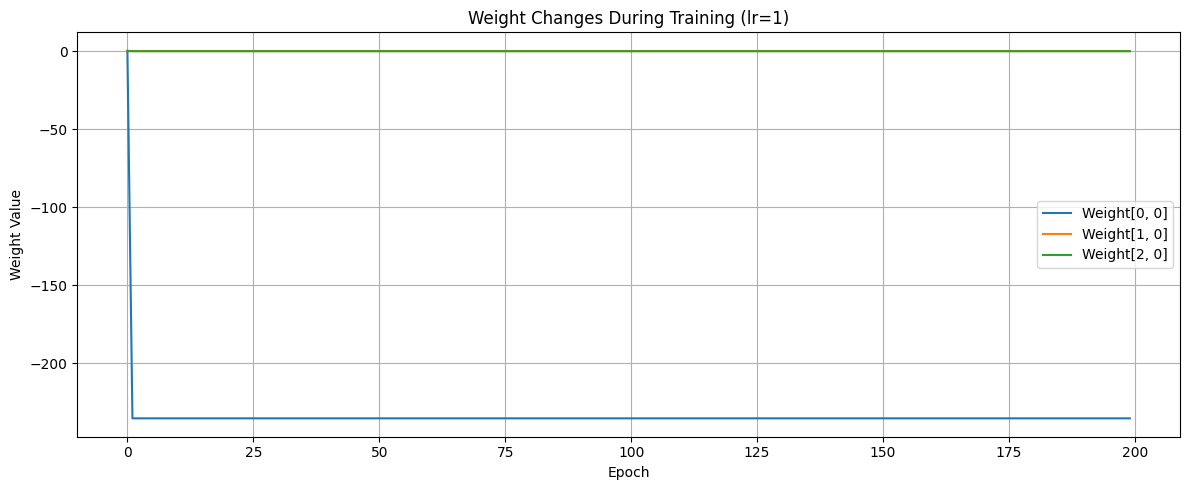

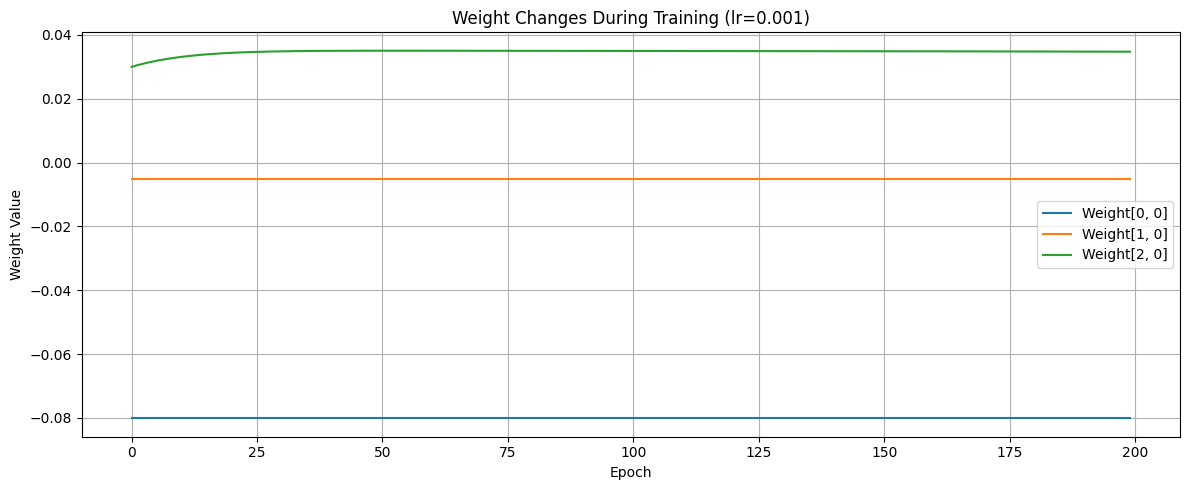

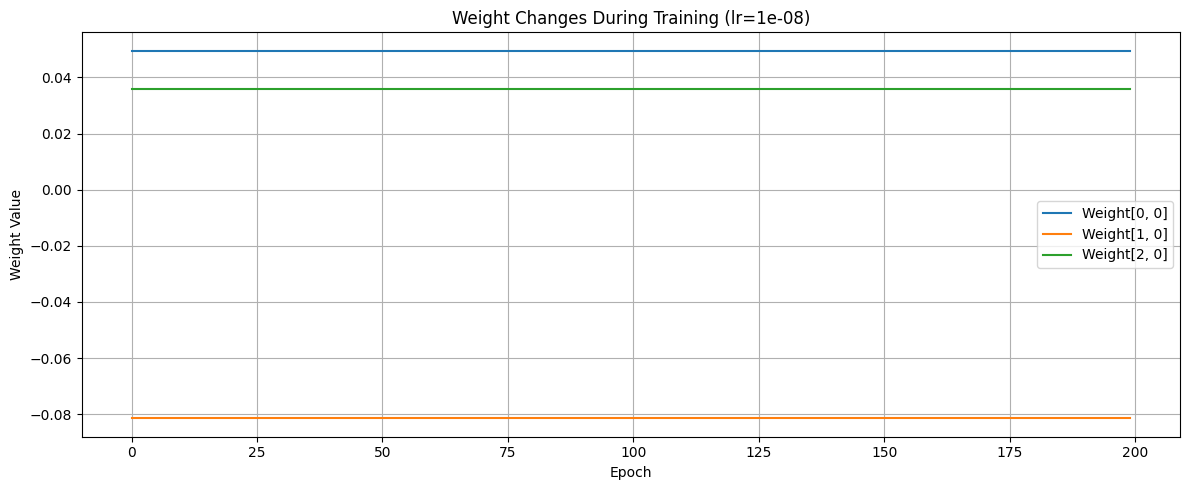

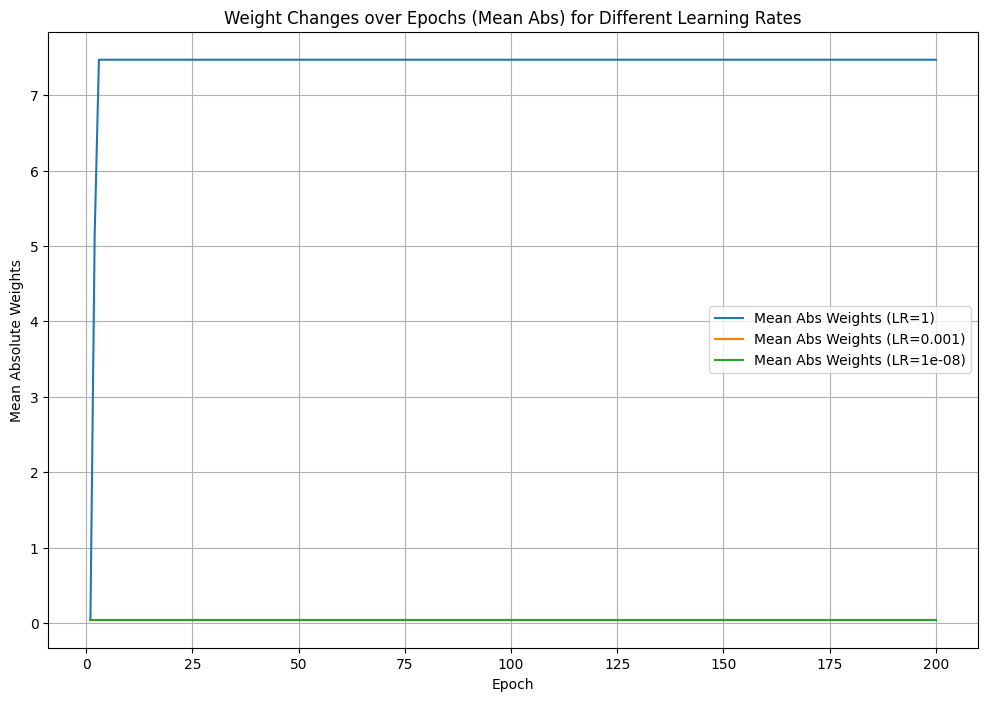

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# نمایش تغییرات 3 وزن اول از لایه hidden برای هر نرخ یادگیری
weights_to_plot = [0, 1, 2]  # ایندکس وزن‌ها

for lr in learning_rates:
    snapshots = weights_history[lr]
    snapshots = np.array(snapshots)  # (epochs, hidden_units, input_features)

    plt.figure(figsize=(12, 5))
    for w in weights_to_plot:
        weight_values = snapshots[:, w, 0]  # وزن w از ورودی اول (برای سادگی)
        plt.plot(weight_values, label=f"Weight[{w}, 0]")

    plt.title(f"Weight Changes During Training (lr={lr})")
    plt.xlabel("Epoch")
    plt.ylabel("Weight Value")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


# ذخیره میانگین قدر مطلق وزن‌های hidden لایه برای هر نرخ یادگیری
mean_abs_weight_history = {}

for lr in learning_rates:
    snapshots = weights_history[lr]  # لیستی از وزن‌ها به شکل (hidden_units, input_features)
    mean_abs_list = [np.mean(np.abs(w)) for w in snapshots]
    mean_abs_weight_history[lr] = mean_abs_list

# رسم میانگین قدر مطلق وزن‌ها مثل
plt.figure(figsize=(12, 8))
for lr in learning_rates:
    plt.plot(range(1, num_epochs + 1), mean_abs_weight_history[lr], label=f'Mean Abs Weights (LR={lr})')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Weights')
plt.title('Weight Changes over Epochs (Mean Abs) for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()


###pre processing

Device: cpu


Training Progress (lr=0.001): 100%|██████████| 200/200 [00:01<00:00, 173.47it/s]


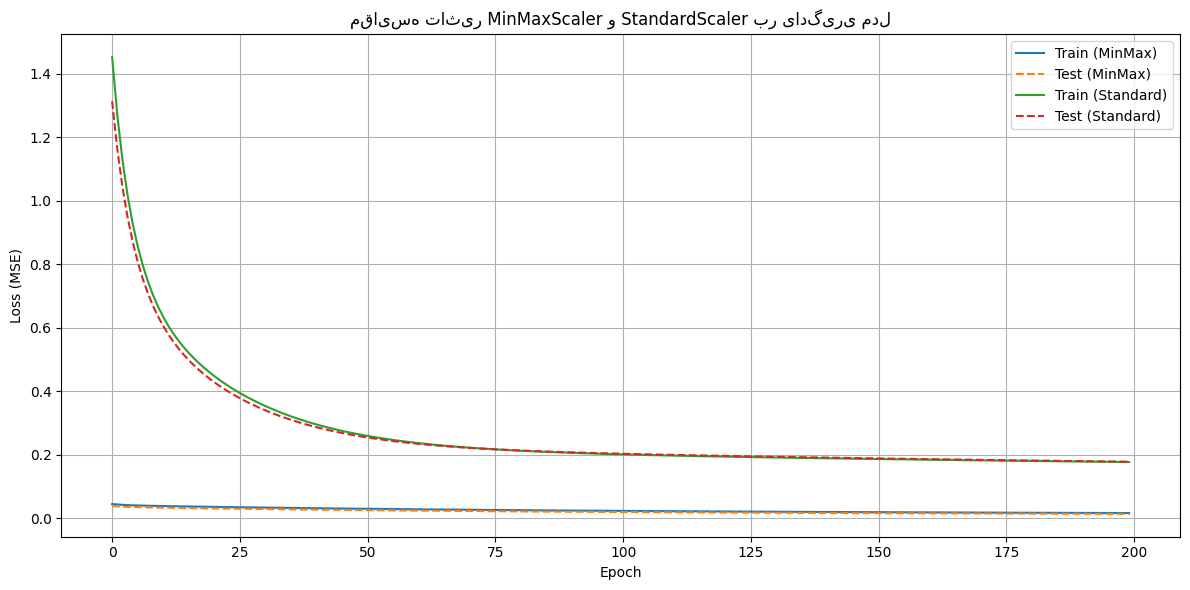

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler, StandardScaler

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device:", device)

# فرض بر این است که df_train و df_test قبلاً ساخته شده‌اند و ستون TOURS_temp_next هم وجود دارد.

# ----------------------------
# 1. آماده‌سازی دو نوع نرمال‌سازی
# ----------------------------
numerical_cols = df_train.select_dtypes(include=["number"]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ["MONTH"]]

# MinMax
minmax_scaler = MinMaxScaler()
df_train_minmax = df_train.copy()
df_test_minmax = df_test.copy()
df_train_minmax[numerical_cols] = minmax_scaler.fit_transform(df_train[numerical_cols])
df_test_minmax[numerical_cols] = minmax_scaler.transform(df_test[numerical_cols])

# StandardScaler
standard_scaler = StandardScaler()
df_train_std = df_train.copy()
df_test_std = df_test.copy()
df_train_std[numerical_cols] = standard_scaler.fit_transform(df_train[numerical_cols])
df_test_std[numerical_cols] = standard_scaler.transform(df_test[numerical_cols])

# ----------------------------
# 2. Sliding window function
# ----------------------------
def generate_sequence_windows(dataframe, window_length=5, step=1):
    data = dataframe.select_dtypes(include=[np.number]).to_numpy()
    total_rows, num_features = data.shape
    num_windows = (total_rows - window_length) // step + 1
    windows = np.lib.stride_tricks.sliding_window_view(data, (window_length, num_features))
    sequence_array = windows.reshape(-1, window_length, num_features)
    return sequence_array[::step]

# ----------------------------
# 3. ساخت توالی‌ها و هدف‌ها
# ----------------------------
target_col = "TOURS_temp_next"

# MinMax
train_seq_minmax = generate_sequence_windows(df_train_minmax, window_length=5)
test_seq_minmax = generate_sequence_windows(df_test_minmax, window_length=5)
train_targets_minmax = df_train_minmax.iloc[4:][target_col].values[:train_seq_minmax.shape[0]]
test_targets_minmax = df_test_minmax.iloc[4:][target_col].values[:test_seq_minmax.shape[0]]

# Standard
train_seq_std = generate_sequence_windows(df_train_std, window_length=5)
test_seq_std = generate_sequence_windows(df_test_std, window_length=5)
train_targets_std = df_train_std.iloc[4:][target_col].values[:train_seq_std.shape[0]]
test_targets_std = df_test_std.iloc[4:][target_col].values[:test_seq_std.shape[0]]

# ----------------------------
# 4. تعریف مدل ساده
# ----------------------------
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size=64, output_size=1):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.flatten(x)
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

# ----------------------------
# 5. تابع آموزش
# ----------------------------
def train_model(X_train_np, y_train_np, X_test_np, y_test_np, lr=0.001, num_epochs=200):
    X_train = torch.tensor(X_train_np, dtype=torch.float32).to(device)
    y_train = torch.tensor(y_train_np, dtype=torch.float32).unsqueeze(1).to(device)
    X_test = torch.tensor(X_test_np, dtype=torch.float32).to(device)
    y_test = torch.tensor(y_test_np, dtype=torch.float32).unsqueeze(1).to(device)

    model = SimpleNN(X_train.shape[1]*X_train.shape[2]).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    train_losses = []
    test_losses = []

    for epoch in tqdm(range(num_epochs), desc=f"Training Progress (lr={lr})"):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test).item()
            test_losses.append(test_loss)

    return train_losses, test_losses

# ----------------------------
# 6. آموزش مدل‌ها با دو نوع نرمال‌سازی
# ----------------------------
train_losses_minmax, test_losses_minmax = train_model(train_seq_minmax, train_targets_minmax, test_seq_minmax, test_targets_minmax)
train_losses_std, test_losses_std = train_model(train_seq_std, train_targets_std, test_seq_std, test_targets_std)

# ----------------------------
# 7. رسم نمودار مقایسه‌ای
# ----------------------------
plt.figure(figsize=(12,6))
plt.plot(train_losses_minmax, label="Train (MinMax)")
plt.plot(test_losses_minmax, label="Test (MinMax)", linestyle='--')
plt.plot(train_losses_std, label="Train (Standard)")
plt.plot(test_losses_std, label="Test (Standard)", linestyle='--')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("مقایسه تاثیر MinMaxScaler و StandardScaler بر یادگیری مدل")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


###Weight Initialization

Using device: cpu

🔧 Training model with initialization: default


Training (init=default): 100%|██████████| 200/200 [00:01<00:00, 177.44it/s]



🔧 Training model with initialization: xavier


Training (init=xavier): 100%|██████████| 200/200 [00:01<00:00, 177.19it/s]



🔧 Training model with initialization: kaiming


Training (init=kaiming): 100%|██████████| 200/200 [00:01<00:00, 178.90it/s]
/tmp/ipython-input-39-1139546266.py:117: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


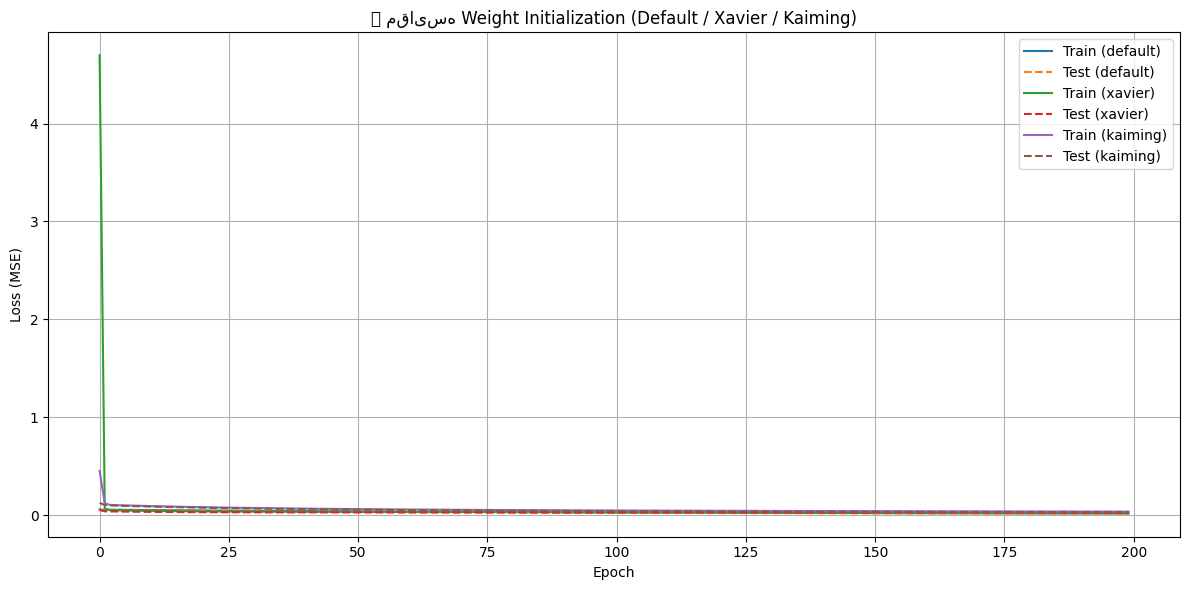

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm

# فرض بر این است که:
# - `train_seq_minmax`, `test_seq_minmax`, `train_targets_minmax`, `test_targets_minmax`
# - از مرحله قبلی (نرمال‌سازی MinMax) ساخته شده‌اند.

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

# ----------------------------
# 1. تعریف مدل با initialization قابل انتخاب
# ----------------------------
class SimpleNNInit(nn.Module):
    def __init__(self, input_size, hidden_size=64, output_size=1, init_type="default"):
        super(SimpleNNInit, self).__init__()
        self.flatten = nn.Flatten()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)

        # مقداردهی اولیه بر اساس نوع انتخاب‌شده
        if init_type == "xavier":
            nn.init.xavier_uniform_(self.hidden.weight)
            nn.init.zeros_(self.hidden.bias)
            nn.init.xavier_uniform_(self.output.weight)
            nn.init.zeros_(self.output.bias)

        elif init_type == "kaiming":
            nn.init.kaiming_uniform_(self.hidden.weight, nonlinearity='relu')
            nn.init.zeros_(self.hidden.bias)
            nn.init.kaiming_uniform_(self.output.weight, nonlinearity='relu')
            nn.init.zeros_(self.output.bias)

        elif init_type == "default":
            pass  # استفاده از مقادیر PyTorch پیش‌فرض

        else:
            raise ValueError("❌ مقداردهی اولیه ناشناخته: " + init_type)

    def forward(self, x):
        x = self.flatten(x)
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x


# ----------------------------
# 2. تابع آموزش مدل با انتخاب نوع initialization
# ----------------------------
def train_model_with_init(X_train_np, y_train_np, X_test_np, y_test_np, init_type="default", lr=0.001, num_epochs=200):
    X_train = torch.tensor(X_train_np, dtype=torch.float32).to(device)
    y_train = torch.tensor(y_train_np, dtype=torch.float32).unsqueeze(1).to(device)
    X_test = torch.tensor(X_test_np, dtype=torch.float32).to(device)
    y_test = torch.tensor(y_test_np, dtype=torch.float32).unsqueeze(1).to(device)

    input_size = X_train.shape[1] * X_train.shape[2]
    model = SimpleNNInit(input_size, init_type=init_type).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    train_losses = []
    test_losses = []

    for epoch in tqdm(range(num_epochs), desc=f"Training (init={init_type})"):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test).item()
            test_losses.append(test_loss)

    return train_losses, test_losses

# ----------------------------
# 3. اجرای آموزش با 3 نوع مقداردهی اولیه
# ----------------------------
initializations = ["default", "xavier", "kaiming"]
results_init = {}

for init in initializations:
    print(f"\n🔧 Training model with initialization: {init}")
    train_loss, test_loss = train_model_with_init(
        train_seq_minmax,
        train_targets_minmax,
        test_seq_minmax,
        test_targets_minmax,
        init_type=init
    )
    results_init[init] = {"train": train_loss, "test": test_loss}

# ----------------------------
# 4. رسم نمودار مقایسه‌ای
# ----------------------------
plt.figure(figsize=(12,6))
for init in initializations:
    plt.plot(results_init[init]["train"], label=f"Train ({init})")
    plt.plot(results_init[init]["test"], label=f"Test ({init})", linestyle='--')

plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("📊 مقایسه Weight Initialization (Default / Xavier / Kaiming)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


###Batch Normalization

📌 Using device: cpu


With BatchNorm: 100%|██████████| 200/200 [00:01<00:00, 148.88it/s]
/tmp/ipython-input-40-713105609.py:103: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


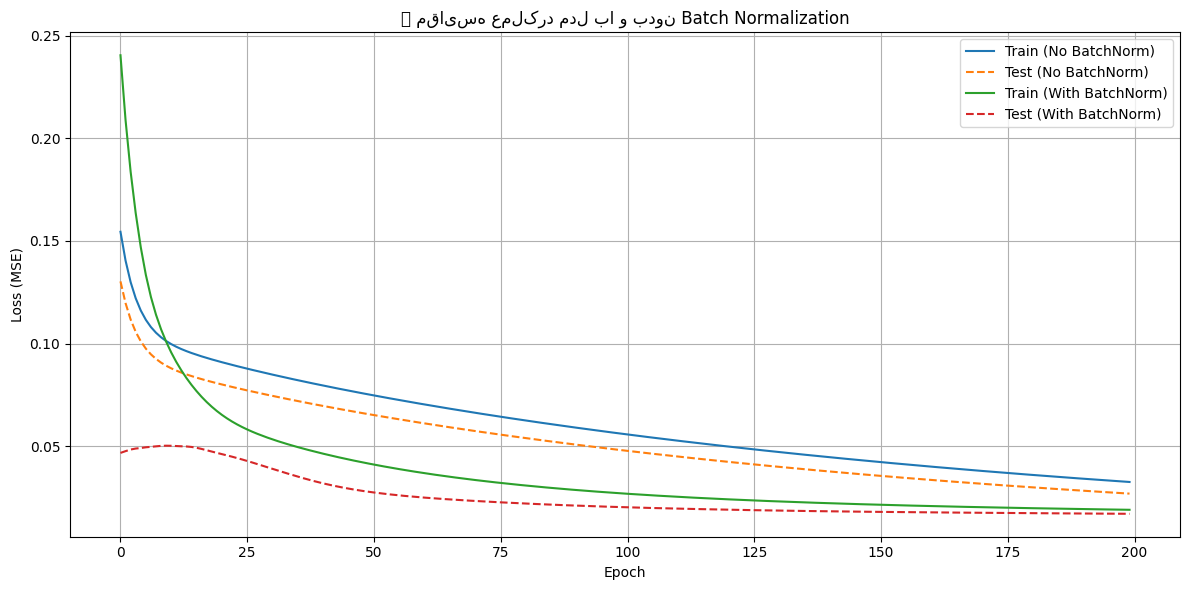

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm

# ----------------------------
# 1. تنظیمات و داده‌ها
# ----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("📌 Using device:", device)

# فرض بر اینه که این داده‌ها قبلاً ساخته شدن:
# train_seq_minmax, test_seq_minmax, train_targets_minmax, test_targets_minmax

# ----------------------------
# 2. تعریف مدل با امکان فعال/غیرفعال کردن BatchNorm
# ----------------------------
class SimpleNN_BN(nn.Module):
    def __init__(self, input_size, hidden_size=64, output_size=1, use_batchnorm=False):
        super(SimpleNN_BN, self).__init__()
        self.flatten = nn.Flatten()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.use_bn = use_batchnorm
        if self.use_bn:
            self.bn = nn.BatchNorm1d(hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.flatten(x)
        x = self.hidden(x)
        if self.use_bn:
            x = self.bn(x)
        x = self.relu(x)
        x = self.output(x)
        return x

# ----------------------------
# 3. تابع آموزش مدل
# ----------------------------
def train_model_bn(X_train_np, y_train_np, X_test_np, y_test_np, use_batchnorm=False, lr=0.001, num_epochs=200):
    X_train = torch.tensor(X_train_np, dtype=torch.float32).to(device)
    y_train = torch.tensor(y_train_np, dtype=torch.float32).unsqueeze(1).to(device)
    X_test = torch.tensor(X_test_np, dtype=torch.float32).to(device)
    y_test = torch.tensor(y_test_np, dtype=torch.float32).unsqueeze(1).to(device)

    input_size = X_train.shape[1] * X_train.shape[2]
    model = SimpleNN_BN(input_size, use_batchnorm=use_batchnorm).to(device)

    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    train_losses = []
    test_losses = []

    for epoch in tqdm(range(num_epochs), desc=f"{'With' if use_batchnorm else 'Without'} BatchNorm"):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test).item()
            test_losses.append(test_loss)

    return train_losses, test_losses

# ----------------------------
# 4. اجرای آموزش با و بدون BatchNorm
# ----------------------------
train_loss_no_bn, test_loss_no_bn = train_model_bn(
    train_seq_minmax, train_targets_minmax,
    test_seq_minmax, test_targets_minmax,
    use_batchnorm=False
)

train_loss_bn, test_loss_bn = train_model_bn(
    train_seq_minmax, train_targets_minmax,
    test_seq_minmax, test_targets_minmax,
    use_batchnorm=True
)

# ----------------------------
# 5. رسم نمودار مقایسه‌ای
# ----------------------------
plt.figure(figsize=(12,6))
plt.plot(train_loss_no_bn, label="Train (No BatchNorm)")
plt.plot(test_loss_no_bn, label="Test (No BatchNorm)", linestyle='--')
plt.plot(train_loss_bn, label="Train (With BatchNorm)")
plt.plot(test_loss_bn, label="Test (With BatchNorm)", linestyle='--')

plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("📊 مقایسه عملکرد مدل با و بدون Batch Normalization")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


###Regularization

📌 Using device: cpu


Training (L2=0.01): 100%|██████████| 200/200 [00:01<00:00, 111.92it/s]
/tmp/ipython-input-41-2375285152.py:95: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


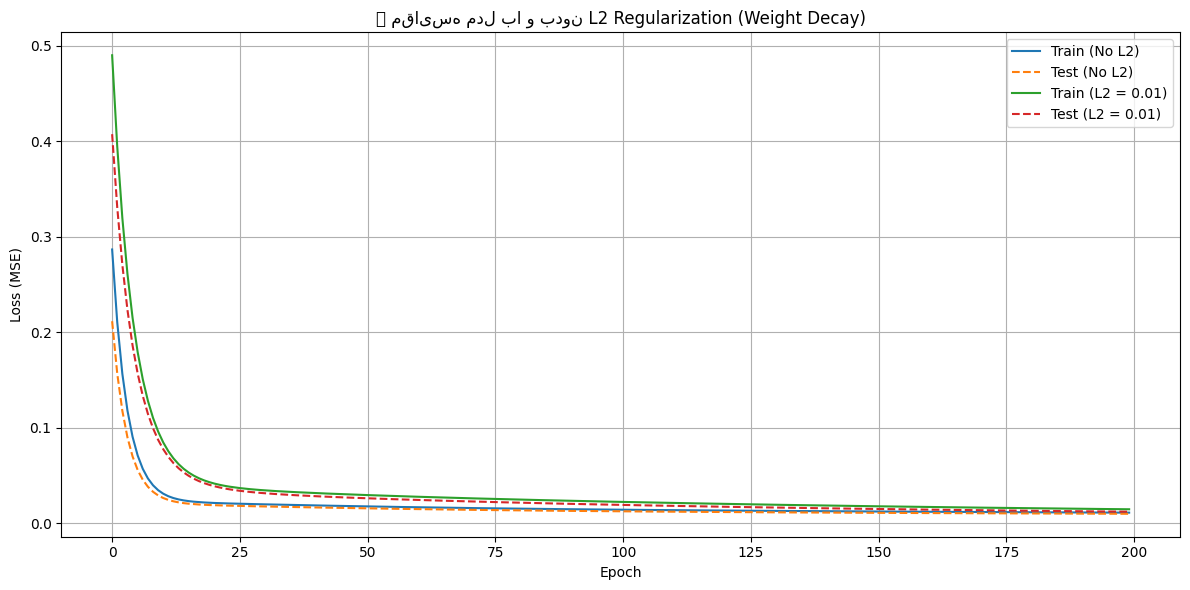

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm

# ----------------------------
# 1. تنظیمات پایه
# ----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("📌 Using device:", device)

# ----------------------------
# 2. تعریف مدل ساده
# ----------------------------
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size=64, output_size=1):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.flatten(x)
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

# ----------------------------
# 3. تابع آموزش مدل با کنترل L2
# ----------------------------
def train_model_l2(X_train_np, y_train_np, X_test_np, y_test_np, weight_decay=0.0, lr=0.001, num_epochs=200):
    X_train = torch.tensor(X_train_np, dtype=torch.float32).to(device)
    y_train = torch.tensor(y_train_np, dtype=torch.float32).unsqueeze(1).to(device)
    X_test = torch.tensor(X_test_np, dtype=torch.float32).to(device)
    y_test = torch.tensor(y_test_np, dtype=torch.float32).unsqueeze(1).to(device)

    input_size = X_train.shape[1] * X_train.shape[2]
    model = SimpleNN(input_size).to(device)

    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=weight_decay)

    train_losses = []
    test_losses = []

    for epoch in tqdm(range(num_epochs), desc=f"Training (L2={weight_decay})"):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test).item()
            test_losses.append(test_loss)

    return train_losses, test_losses

# ----------------------------
# 4. آموزش مدل‌ها با و بدون Regularization
# ----------------------------
train_loss_l2_0, test_loss_l2_0 = train_model_l2(
    train_seq_minmax, train_targets_minmax,
    test_seq_minmax, test_targets_minmax,
    weight_decay=0.0  # بدون L2
)

train_loss_l2_01, test_loss_l2_01 = train_model_l2(
    train_seq_minmax, train_targets_minmax,
    test_seq_minmax, test_targets_minmax,
    weight_decay=0.01  # با L2
)

# ----------------------------
# 5. رسم نمودار مقایسه‌ای
# ----------------------------
plt.figure(figsize=(12,6))
plt.plot(train_loss_l2_0, label="Train (No L2)")
plt.plot(test_loss_l2_0, label="Test (No L2)", linestyle='--')
plt.plot(train_loss_l2_01, label="Train (L2 = 0.01)")
plt.plot(test_loss_l2_01, label="Test (L2 = 0.01)", linestyle='--')

plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("📉 مقایسه مدل با و بدون L2 Regularization (Weight Decay)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


###Dropout

📌 Using device: cpu


Dropout p=0.5: 100%|██████████| 200/200 [00:01<00:00, 145.48it/s]
/tmp/ipython-input-42-2623257645.py:97: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


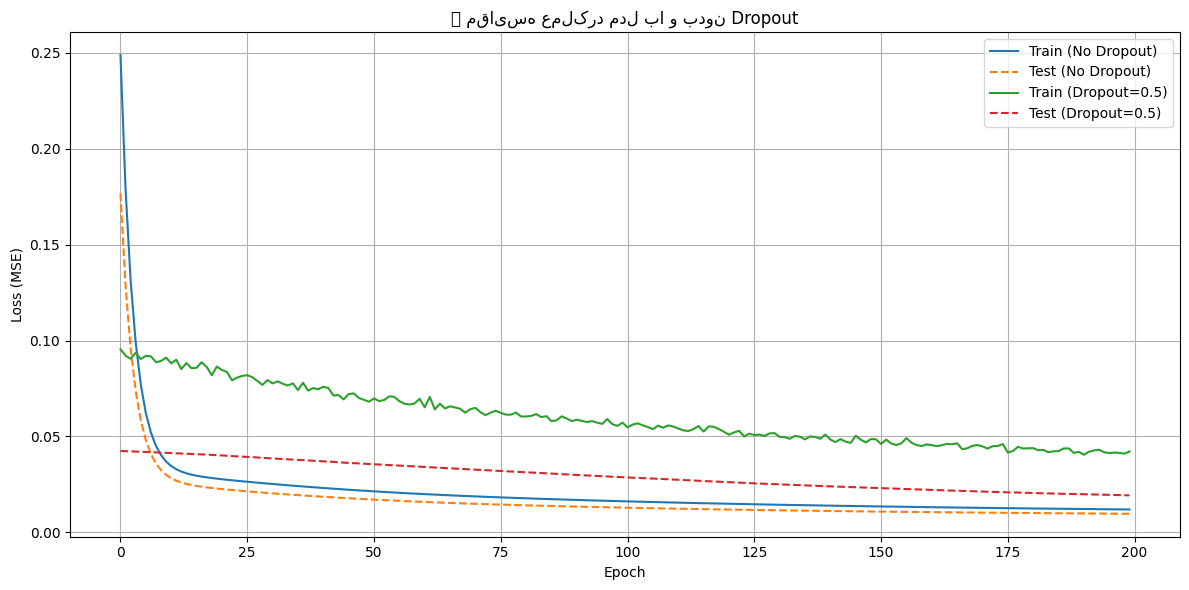

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm

# ----------------------------
# 1. تنظیمات پایه
# ----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("📌 Using device:", device)

# ----------------------------
# 2. تعریف مدل با Dropout
# ----------------------------
class SimpleNN_Dropout(nn.Module):
    def __init__(self, input_size, hidden_size=64, output_size=1, dropout_prob=0.0):
        super(SimpleNN_Dropout, self).__init__()
        self.flatten = nn.Flatten()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_prob)
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.flatten(x)
        x = self.hidden(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.output(x)
        return x

# ----------------------------
# 3. تابع آموزش با کنترل Dropout
# ----------------------------
def train_model_dropout(X_train_np, y_train_np, X_test_np, y_test_np, dropout_prob=0.0, lr=0.001, num_epochs=200):
    X_train = torch.tensor(X_train_np, dtype=torch.float32).to(device)
    y_train = torch.tensor(y_train_np, dtype=torch.float32).unsqueeze(1).to(device)
    X_test = torch.tensor(X_test_np, dtype=torch.float32).to(device)
    y_test = torch.tensor(y_test_np, dtype=torch.float32).unsqueeze(1).to(device)

    input_size = X_train.shape[1] * X_train.shape[2]
    model = SimpleNN_Dropout(input_size, dropout_prob=dropout_prob).to(device)

    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    train_losses = []
    test_losses = []

    for epoch in tqdm(range(num_epochs), desc=f"Dropout p={dropout_prob}"):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test).item()
            test_losses.append(test_loss)

    return train_losses, test_losses

# ----------------------------
# 4. آموزش مدل‌ها با و بدون Dropout
# ----------------------------
train_loss_d0, test_loss_d0 = train_model_dropout(
    train_seq_minmax, train_targets_minmax,
    test_seq_minmax, test_targets_minmax,
    dropout_prob=0.0
)

train_loss_d5, test_loss_d5 = train_model_dropout(
    train_seq_minmax, train_targets_minmax,
    test_seq_minmax, test_targets_minmax,
    dropout_prob=0.5
)

# ----------------------------
# 5. رسم نمودار مقایسه‌ای
# ----------------------------
plt.figure(figsize=(12,6))
plt.plot(train_loss_d0, label="Train (No Dropout)")
plt.plot(test_loss_d0, label="Test (No Dropout)", linestyle='--')
plt.plot(train_loss_d5, label="Train (Dropout=0.5)")
plt.plot(test_loss_d5, label="Test (Dropout=0.5)", linestyle='--')

plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("🔁 مقایسه عملکرد مدل با و بدون Dropout")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


###Activation Functionها: ReLU, Sigmoid, Tanh



Sigmoid: 100%|██████████| 200/200 [00:01<00:00, 164.00it/s]
/tmp/ipython-input-43-740214980.py:93: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


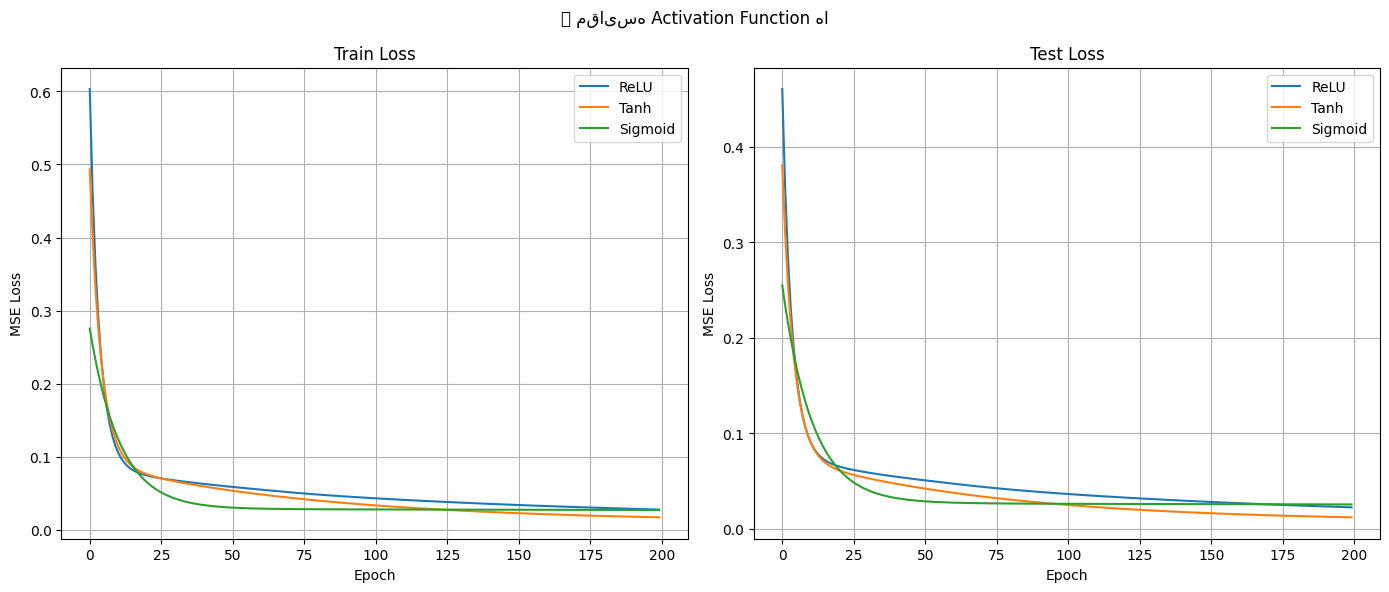

In [ ]:
# -------------------------------
# تعریف مدل با Activation دلخواه
# -------------------------------
class SimpleNN_Activation(nn.Module):
    def __init__(self, input_size, hidden_size=64, output_size=1, activation_fn=nn.ReLU):
        super(SimpleNN_Activation, self).__init__()
        self.flatten = nn.Flatten()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.activation = activation_fn()
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.flatten(x)
        x = self.hidden(x)
        x = self.activation(x)
        x = self.output(x)
        return x

# -------------------------------
# تابع آموزش برای Activation Function
# -------------------------------
def train_model_activation(X_train_np, y_train_np, X_test_np, y_test_np, activation_fn=nn.ReLU, lr=0.001, num_epochs=200):
    X_train = torch.tensor(X_train_np, dtype=torch.float32).to(device)
    y_train = torch.tensor(y_train_np, dtype=torch.float32).unsqueeze(1).to(device)
    X_test = torch.tensor(X_test_np, dtype=torch.float32).to(device)
    y_test = torch.tensor(y_test_np, dtype=torch.float32).unsqueeze(1).to(device)

    input_size = X_train.shape[1] * X_train.shape[2]
    model = SimpleNN_Activation(input_size, activation_fn=activation_fn).to(device)

    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    train_losses = []
    test_losses = []

    for epoch in tqdm(range(num_epochs), desc=f"{activation_fn.__name__}"):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test).item()
            test_losses.append(test_loss)

    return train_losses, test_losses

# اجرای مدل‌ها با activation مختلف
train_relu, test_relu = train_model_activation(train_seq_minmax, train_targets_minmax,
                                               test_seq_minmax, test_targets_minmax,
                                               activation_fn=nn.ReLU)

train_tanh, test_tanh = train_model_activation(train_seq_minmax, train_targets_minmax,
                                               test_seq_minmax, test_targets_minmax,
                                               activation_fn=nn.Tanh)

train_sigmoid, test_sigmoid = train_model_activation(train_seq_minmax, train_targets_minmax,
                                                     test_seq_minmax, test_targets_minmax,
                                                     activation_fn=nn.Sigmoid)

# -------------------------------
# رسم نمودار مقایسه‌ای
# -------------------------------
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.plot(train_relu, label='ReLU')
plt.plot(train_tanh, label='Tanh')
plt.plot(train_sigmoid, label='Sigmoid')
plt.title('Train Loss')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_relu, label='ReLU')
plt.plot(test_tanh, label='Tanh')
plt.plot(test_sigmoid, label='Sigmoid')
plt.title('Test Loss')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.legend()

plt.suptitle("📊 مقایسه Activation Function ها")
plt.tight_layout()
plt.show()


#Q4

In [ ]:
!pip install rarfile --quiet
!apt-get update
!apt-get install -y swig
!pip install stable-baselines3 > /dev/null
!pip install box2d-py > /dev/null
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!sudo apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:
# install dependencies
!pip3 install gym --upgrade
!pip3 install pyglet
!pip3 install Box2D
!pip3 install box2d-py
!pip3 install gym[Box_2D]
!pip3 install gym[box2d]
!pip install -q "gymnasium[box2d]"


  Using cached pygame-2.1.0.tar.gz (5.8 MB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!sudo apt-get update
!sudo apt-get install xvfb

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:
import torch

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
#import gymnasium as gym  # instead of 'import gym'

#env = gym.make("LunarLander-v2", render_mode="rgb_array")  # note the '-v3' version
#state, info = env.reset()

#TODO: find observation size: 8
#state_size = env.observation_space.shape[0]
#TODO: find action size: 4: 0- Do nothing 1- Fire left engine 2- Fire down engine 3- Fire right engine
#action_size = env.action_space.n
#state_size, action_size

In [ ]:
# enviroment
import gym
env = gym.make('LunarLander-v2', render_mode="rgb_array")
#TODO: find observation size: 8
state_size = env.observation_space.shape[0]
#TODO: find action size: 4: 0- Do nothing 1- Fire left engine 2- Fire down engine 3- Fire right engine
action_size = env.action_space.n
state_size, action_size

(8, 4)

In [ ]:
# VIDEO
import io
import os
import glob
import torch
import base64
import stable_baselines3
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from stable_baselines3.common.results_plotter import ts2xy, load_results
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.env_util import make_atari_env
import gym
from gym import spaces
from gym.wrappers import RecordVideo
from gym.wrappers.monitoring import video_recorder

from IPython.display import HTML
from IPython import display
from IPython import display as ipythondisplay
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
import random
from collections import namedtuple, deque
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

display = Display(visible=0, size=(1400, 900))
display.start()

"""
Utility functions to enable video recording of gym environment
and displaying it.
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
      mp4 = mp4list[0]
      video = io.open(mp4, 'r+b').read()
      encoded = base64.b64encode(video)
      ipythondisplay.display(HTML(data='''<video alt="test" autoplay loop controls style="height: 400px;">
                  <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                </video>'''.format(encoded.decode('ascii'))))
  else:
      print("Could not find video")

In [ ]:
# experience replay
import random
from collections import namedtuple, deque

Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward', 'done'))

class ExperienceReplay():
    def __init__(self, capacity):
        self.memory = deque([], maxlen=capacity)

    def store_trans(self, s, a, sp, r, done):
        transition = Transition(s, a, sp, r, done)
        self.memory.append(transition)

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)


In [ ]:
# DQN
import torch.nn as nn
import torch.nn.functional as F


class DeepQNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(DeepQNetwork, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(state_size, 512),
            nn.ReLU(),
            nn.LayerNorm(512),
            nn.Dropout(0.1),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.LayerNorm(512),
            nn.Dropout(0.1),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, action_size)
        )

    def forward(self, x):
        return self.net(x)


## DQN

In [ ]:
# DQN agent
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class DQNAgent():
    def __init__(self, state_size, action_size, batch_size, gamma=0.99, buffer_size=25000, alpha=1e-4, tau=1e-3):
        self.state_size = state_size
        self.action_size = action_size
        self.batch_size = batch_size
        self.gamma = gamma
        self.tau = tau  # For soft update of target network parameters
        self.experience_replay = ExperienceReplay(buffer_size)

        # Main network
        self.value_net = DeepQNetwork(state_size, action_size).to(device)
        # Target network
        self.target_net = DeepQNetwork(state_size, action_size).to(device)
        self.target_net.load_state_dict(self.value_net.state_dict())
        self.target_net.eval()  # Target network does not train

        self.optimizer = optim.Adam(self.value_net.parameters(), lr=alpha)

    def take_action(self, state, eps=0.0):
        self.value_net.eval()
        if random.random() > eps:
            with torch.no_grad():
                return torch.argmax(self.value_net(torch.tensor(state).float().unsqueeze(0).to(device))).item()
        else:
            return np.random.randint(0, self.action_size)

    def update_params(self):
        if len(self.experience_replay) < self.batch_size:
            return
        batch = Transition(*zip(*self.experience_replay.sample(self.batch_size)))

        state_batch = torch.tensor(np.array(batch.state), dtype=torch.float32).to(device)
        action_batch = torch.tensor(batch.action, dtype=torch.int64).unsqueeze(1).to(device)
        next_state_batch = torch.tensor(np.array(batch.next_state), dtype=torch.float32).to(device)
        reward_batch = torch.tensor(batch.reward, dtype=torch.float32).unsqueeze(1).to(device)
        done_batch = torch.tensor(batch.done, dtype=torch.float32).unsqueeze(1).to(device)

        q_expected = self.value_net(state_batch).gather(1, action_batch)
        q_targets_next = self.target_net(next_state_batch).detach().max(1)[0].unsqueeze(1)
        q_targets = reward_batch + (self.gamma * q_targets_next * (1 - done_batch))
        loss = F.mse_loss(q_expected, q_targets)

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # Soft update target network parameters
        for target_param, local_param in zip(self.target_net.parameters(), self.value_net.parameters()):
            target_param.data.copy_(self.tau * local_param.data + (1.0 - self.tau) * target_param.data)

    def save(self, fname):
        torch.save(self.value_net.state_dict(), fname)

    def load(self, fname):
        self.value_net.load_state_dict(torch.load(fname, map_location=device))



###Batch 32

In [ ]:
# NOTE: DON'T change values
n_episodes = 250
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE = 32

In [ ]:
# training phase

agent = DQNAgent(state_size, action_size, batch_size=BATCH_SIZE)
crs = np.zeros(n_episodes)
crs_recent = deque(maxlen=25)

for i_episode in range(1, n_episodes + 1):
    env = RecordVideo(gym.make("LunarLander-v2", render_mode="rgb_array"), f"./DQN/batch{BATCH_SIZE}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v2", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_replay.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 25	Average Reward: -113.02	Epsilon: 0.47
Episode 49	Average Reward: -66.33	Epsilon: 0.22

/usr/local/lib/python3.11/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DQN/batch32/eps50 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DQN/batch32/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch32/eps50/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch32/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -59.80	Epsilon: 0.22
Episode 75	Average Reward: 9.29	Epsilon: 0.10
Episode 99	Average Reward: 90.93	Epsilon: 0.05

/usr/local/lib/python3.11/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DQN/batch32/eps100 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DQN/batch32/eps100/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch32/eps100/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch32/eps100/rl-video-episode-0.mp4
Episode 100	Average Reward: 89.82	Epsilon: 0.05
Episode 125	Average Reward: 126.04	Epsilon: 0.02
Episode 149	Average Reward: 132.81	Epsilon: 0.01

/usr/local/lib/python3.11/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DQN/batch32/eps150 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DQN/batch32/eps150/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch32/eps150/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch32/eps150/rl-video-episode-0.mp4
Episode 150	Average Reward: 140.56	Epsilon: 0.01
Episode 175	Average Reward: 170.79	Epsilon: 0.01
Episode 199	Average Reward: 151.74	Epsilon: 0.01

/usr/local/lib/python3.11/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DQN/batch32/eps200 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DQN/batch32/eps200/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch32/eps200/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch32/eps200/rl-video-episode-0.mp4
Episode 200	Average Reward: 141.83	Epsilon: 0.01
Episode 225	Average Reward: 158.55	Epsilon: 0.01
Episode 249	Average Reward: 172.96	Epsilon: 0.01

/usr/local/lib/python3.11/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/DQN/batch32/eps250 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/DQN/batch32/eps250/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch32/eps250/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch32/eps250/rl-video-episode-0.mp4
Episode 250	Average Reward: 161.22	Epsilon: 0.01


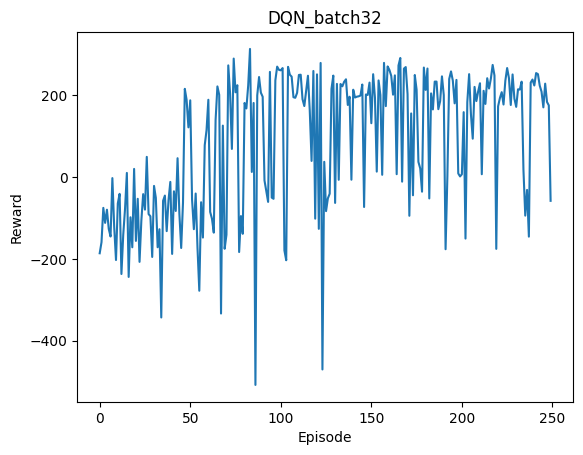

0

In [ ]:
fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DQN_batch{BATCH_SIZE}")
plt.savefig(f"DQN_batch{BATCH_SIZE}.pdf")
plt.show()
os.system("zip -r DQN.zip DQN/")

###Batch 64

In [ ]:
# NOTE: DON'T change values
n_episodes = 250
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE = 64

In [ ]:
# training phase

agent = DQNAgent(state_size, action_size, batch_size=BATCH_SIZE)
crs = np.zeros(n_episodes)
crs_recent = deque(maxlen=25)

for i_episode in range(1, n_episodes + 1):
    env = RecordVideo(gym.make("LunarLander-v2", render_mode="rgb_array"), f"./DQN/batch{BATCH_SIZE}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v2", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_replay.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 25	Average Reward: -147.19	Epsilon: 0.47
Episode 49	Average Reward: -135.71	Epsilon: 0.22Moviepy - Building video /content/DQN/batch64/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps50/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -131.23	Epsilon: 0.22
Episode 75	Average Reward: 103.58	Epsilon: 0.10
Episode 99	Average Reward: 125.47	Epsilon: 0.05Moviepy - Building video /content/DQN/batch64/eps100/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps100/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps100/rl-video-episode-0.mp4
Episode 100	Average Reward: 125.91	Epsilon: 0.05
Episode 125	Average Reward: 186.64	Epsilon: 0.02
Episode 149	Average Reward: 149.47	Epsilon: 0.01Moviepy - Building video /content/DQN/batch64/eps150/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps150/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps150/rl-video-episode-0.mp4
Episode 150	Average Reward: 150.82	Epsilon: 0.01
Episode 175	Average Reward: 159.18	Epsilon: 0.01
Episode 199	Average Reward: 205.65	Epsilon: 0.01Moviepy - Building video /content/DQN/batch64/eps200/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps200/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps200/rl-video-episode-0.mp4
Episode 200	Average Reward: 206.68	Epsilon: 0.01
Episode 225	Average Reward: 145.76	Epsilon: 0.01
Episode 249	Average Reward: 167.85	Epsilon: 0.01Moviepy - Building video /content/DQN/batch64/eps250/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps250/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps250/rl-video-episode-0.mp4
Episode 250	Average Reward: 158.33	Epsilon: 0.01


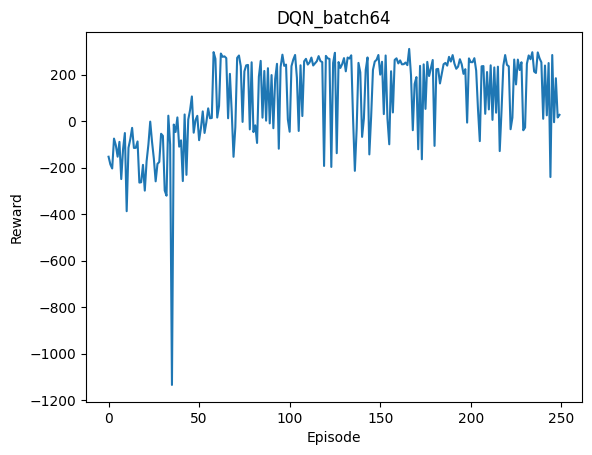

0

In [ ]:
fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DQN_batch{BATCH_SIZE}")
plt.savefig(f"DQN_batch{BATCH_SIZE}.pdf")
plt.show()
os.system("zip -r DQN.zip DQN/")

###Batch 128

In [ ]:
# NOTE: DON'T change values
n_episodes = 250
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE = 128

In [ ]:

agent = DQNAgent(state_size, action_size, batch_size=BATCH_SIZE)
crs = np.zeros(n_episodes)
crs_recent = deque(maxlen=25)

for i_episode in range(1, n_episodes + 1):
    env = RecordVideo(gym.make("LunarLander-v2", render_mode="rgb_array"), f"./DQN/batch{BATCH_SIZE}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v2", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_replay.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 25	Average Reward: -166.92	Epsilon: 0.47
Episode 49	Average Reward: -132.26	Epsilon: 0.22Moviepy - Building video /content/DQN/batch128/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps50/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -121.19	Epsilon: 0.22
Episode 75	Average Reward: -42.09	Epsilon: 0.10
Episode 99	Average Reward: -64.74	Epsilon: 0.05Moviepy - Building video /content/DQN/batch128/eps100/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps100/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps100/rl-video-episode-0.mp4
Episode 100	Average Reward: -65.64	Epsilon: 0.05
Episode 125	Average Reward: 52.43	Epsilon: 0.02
Episode 149	Average Reward: 66.80	Epsilon: 0.01Moviepy - Building video /content/DQN/batch128/eps150/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps150/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps150/rl-video-episode-0.mp4
Episode 150	Average Reward: 66.59	Epsilon: 0.01
Episode 175	Average Reward: 141.83	Epsilon: 0.01
Episode 199	Average Reward: 138.29	Epsilon: 0.01Moviepy - Building video /content/DQN/batch128/eps200/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps200/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps200/rl-video-episode-0.mp4
Episode 200	Average Reward: 140.79	Epsilon: 0.01
Episode 225	Average Reward: 160.91	Epsilon: 0.01
Episode 249	Average Reward: 161.18	Epsilon: 0.01Moviepy - Building video /content/DQN/batch128/eps250/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps250/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps250/rl-video-episode-0.mp4
Episode 250	Average Reward: 169.64	Epsilon: 0.01


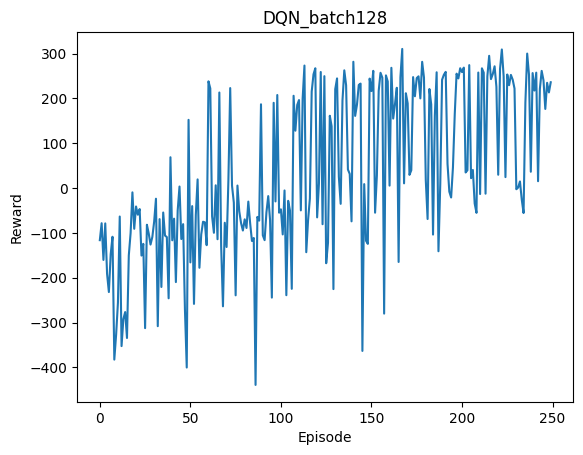

0

In [ ]:
fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DQN_batch{BATCH_SIZE}")
plt.savefig(f"DQN_batch{BATCH_SIZE}.pdf")
plt.show()
os.system("zip -r DQN.zip DQN/")

##DQN Batch=128 Videos (Best Results)

**Episode 50**

In [ ]:
import io
import base64
from IPython.display import HTML
from IPython.display import display as ipythondisplay

def show_video(video_path):
    with open(video_path, 'rb') as f:
        video = f.read()
    encoded = base64.b64encode(video).decode('ascii')
    ipythondisplay(HTML(data=f'''
        <video alt="RL Video" autoplay loop controls style="height: 400px;">
            <source src="data:video/mp4;base64,{encoded}" type="video/mp4" />
        </video>'''))

# Example usage:
video_path = "/content/DQN/batch128/eps50/rl-video-episode-0.mp4"
show_video(video_path)


**Episode 100**

In [ ]:
import io
import base64
from IPython.display import HTML
from IPython.display import display as ipythondisplay

def show_video(video_path):
    with open(video_path, 'rb') as f:
        video = f.read()
    encoded = base64.b64encode(video).decode('ascii')
    ipythondisplay(HTML(data=f'''
        <video alt="RL Video" autoplay loop controls style="height: 400px;">
            <source src="data:video/mp4;base64,{encoded}" type="video/mp4" />
        </video>'''))

# Example usage:
video_path = "/content/DQN/batch128/eps100/rl-video-episode-0.mp4"
show_video(video_path)


**Episode 150**

In [ ]:
import io
import base64
from IPython.display import HTML
from IPython.display import display as ipythondisplay

def show_video(video_path):
    with open(video_path, 'rb') as f:
        video = f.read()
    encoded = base64.b64encode(video).decode('ascii')
    ipythondisplay(HTML(data=f'''
        <video alt="RL Video" autoplay loop controls style="height: 400px;">
            <source src="data:video/mp4;base64,{encoded}" type="video/mp4" />
        </video>'''))

# Example usage:
video_path = "/content/DQN/batch128/eps150/rl-video-episode-0.mp4"
show_video(video_path)


**Episode 200**

In [ ]:
import io
import base64
from IPython.display import HTML
from IPython.display import display as ipythondisplay

def show_video(video_path):
    with open(video_path, 'rb') as f:
        video = f.read()
    encoded = base64.b64encode(video).decode('ascii')
    ipythondisplay(HTML(data=f'''
        <video alt="RL Video" autoplay loop controls style="height: 400px;">
            <source src="data:video/mp4;base64,{encoded}" type="video/mp4" />
        </video>'''))

# Example usage:
video_path = "/content/DQN/batch128/eps200/rl-video-episode-0.mp4"
show_video(video_path)


**Episode 250**

In [ ]:
import io
import base64
from IPython.display import HTML
from IPython.display import display as ipythondisplay

def show_video(video_path):
    with open(video_path, 'rb') as f:
        video = f.read()
    encoded = base64.b64encode(video).decode('ascii')
    ipythondisplay(HTML(data=f'''
        <video alt="RL Video" autoplay loop controls style="height: 400px;">
            <source src="data:video/mp4;base64,{encoded}" type="video/mp4" />
        </video>'''))

# Example usage:
video_path = "/content/DQN/batch128/eps250/rl-video-episode-0.mp4"
show_video(video_path)


##DDQN

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random
import copy

class DDQNAgent():
    def __init__(self, state_size, action_size, batch_size, gamma=0.99, buffer_size=25000, alpha=1e-4, tau=1e-3):
        self.state_size = state_size
        self.action_size = action_size
        self.batch_size = batch_size
        self.gamma = gamma
        self.tau = tau  # For soft update of target network parameters
        self.experience_replay = ExperienceReplay(buffer_size)

        # Main network
        self.value_net = DeepQNetwork(state_size, action_size).to(device)
        # Target network
        self.target_net = DeepQNetwork(state_size, action_size).to(device)
        self.target_net.load_state_dict(self.value_net.state_dict())
        self.target_net.eval()  # Target network does not train

        self.optimizer = optim.Adam(self.value_net.parameters(), lr=alpha)

    def take_action(self, state, eps=0.0):
        self.value_net.eval()
        if random.random() > eps:
            with torch.no_grad():
                return torch.argmax(self.value_net(torch.tensor(state).float().unsqueeze(0).to(device))).item()
        else:
            return np.random.randint(0, self.action_size)

    def update_params(self):
        if len(self.experience_replay) < self.batch_size:
            return
        batch = Transition(*zip(*self.experience_replay.sample(self.batch_size)))

        state_batch = torch.tensor(np.array(batch.state), dtype=torch.float32).to(device)
        action_batch = torch.tensor(batch.action, dtype=torch.int64).unsqueeze(1).to(device)
        next_state_batch = torch.tensor(np.array(batch.next_state), dtype=torch.float32).to(device)
        reward_batch = torch.tensor(batch.reward, dtype=torch.float32).unsqueeze(1).to(device)
        done_batch = torch.tensor(batch.done, dtype=torch.float32).unsqueeze(1).to(device)

        q_expected = self.value_net(state_batch).gather(1, action_batch)

        # Double DQN: Use value_net to select action, target_net to estimate Q-value
        next_action_batch = torch.argmax(self.value_net(next_state_batch), dim=1, keepdim=True)
        q_targets_next = self.target_net(next_state_batch).gather(1, next_action_batch).detach()
        q_targets = reward_batch + (self.gamma * q_targets_next * (1 - done_batch))

        loss = F.mse_loss(q_expected, q_targets)

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # Soft update target network parameters
        self.soft_update(self.value_net, self.target_net, self.tau)

    def soft_update(self, local_model, target_model, tau):
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau * local_param.data + (1.0 - tau) * target_param.data)

    def save(self, fname):
        torch.save(self.value_net.state_dict(), fname)

    def load(self, fname):
        self.value_net.load_state_dict(torch.load(fname, map_location=device))


In [ ]:
# NOTE: DON'T change values
n_episodes = 250
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE = 128

In [ ]:
# training phase

# Initialize agent
agent = DDQNAgent(state_size, action_size, batch_size=BATCH_SIZE)

crs = np.zeros(n_episodes)  # cumulative rewards
crs_recent = deque(maxlen=25)  # recent cumulative rewards

for i_episode in range(1, n_episodes + 1):
    env = RecordVideo(gym.make("LunarLander-v2", render_mode="rgb_array"), f"./DDQN/batch{BATCH_SIZE}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v2", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_replay.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')


/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 25	Average Reward: -128.10	Epsilon: 0.47
Episode 49	Average Reward: -85.39	Epsilon: 0.22Moviepy - Building video /content/DDQN/batch128/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DDQN/batch128/eps50/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DDQN/batch128/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -84.54	Epsilon: 0.22
Episode 75	Average Reward: 85.74	Epsilon: 0.10
Episode 99	Average Reward: 131.35	Epsilon: 0.05Moviepy - Building video /content/DDQN/batch128/eps100/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DDQN/batch128/eps100/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DDQN/batch128/eps100/rl-video-episode-0.mp4
Episode 100	Average Reward: 138.83	Epsilon: 0.05
Episode 125	Average Reward: 178.71	Epsilon: 0.02
Episode 149	Average Reward: 157.13	Epsilon: 0.01Moviepy - Building video /content/DDQN/batch128/eps150/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DDQN/batch128/eps150/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DDQN/batch128/eps150/rl-video-episode-0.mp4
Episode 150	Average Reward: 147.38	Epsilon: 0.01
Episode 175	Average Reward: 141.41	Epsilon: 0.01
Episode 199	Average Reward: 143.05	Epsilon: 0.01Moviepy - Building video /content/DDQN/batch128/eps200/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DDQN/batch128/eps200/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DDQN/batch128/eps200/rl-video-episode-0.mp4
Episode 200	Average Reward: 133.50	Epsilon: 0.01
Episode 225	Average Reward: 45.13	Epsilon: 0.01
Episode 249	Average Reward: 134.55	Epsilon: 0.01Moviepy - Building video /content/DDQN/batch128/eps250/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DDQN/batch128/eps250/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DDQN/batch128/eps250/rl-video-episode-0.mp4
Episode 250	Average Reward: 152.36	Epsilon: 0.01


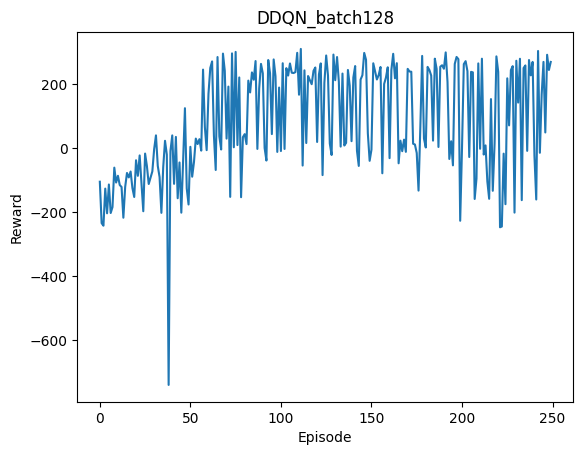

  adding: DDQN/ (stored 0%)
  adding: DDQN/batch128/ (stored 0%)
  adding: DDQN/batch128/eps150/ (stored 0%)
  adding: DDQN/batch128/eps150/rl-video-episode-0.meta.json (deflated 13%)
  adding: DDQN/batch128/eps150/rl-video-episode-0.mp4 (deflated 11%)
  adding: DDQN/batch128/eps250/ (stored 0%)
  adding: DDQN/batch128/eps250/rl-video-episode-0.meta.json (deflated 13%)
  adding: DDQN/batch128/eps250/rl-video-episode-0.mp4 (deflated 15%)
  adding: DDQN/batch128/eps100/ (stored 0%)
  adding: DDQN/batch128/eps100/rl-video-episode-0.meta.json (deflated 13%)
  adding: DDQN/batch128/eps100/rl-video-episode-0.mp4 (deflated 12%)
  adding: DDQN/batch128/eps200/ (stored 0%)
  adding: DDQN/batch128/eps200/rl-video-episode-0.meta.json (deflated 13%)
  adding: DDQN/batch128/eps200/rl-video-episode-0.mp4 (deflated 8%)
  adding: DDQN/batch128/eps50/ (stored 0%)
  adding: DDQN/batch128/eps50/rl-video-episode-0.meta.json (deflated 13%)
  adding: DDQN/batch128/eps50/rl-video-episode-0.mp4 (deflated 11%)

In [ ]:
fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DDQN_batch{BATCH_SIZE}")
plt.savefig(f"DDQN_batch{BATCH_SIZE}.pdf")
plt.show()
! zip -r DDQN3.zip DDQN/

##DDQN Batch=128 Videos (Ep100 and Ep250)

**Episode 100**

In [ ]:
import io
import base64
from IPython.display import HTML
from IPython.display import display as ipythondisplay

def show_video(video_path):
    with open(video_path, 'rb') as f:
        video = f.read()
    encoded = base64.b64encode(video).decode('ascii')
    ipythondisplay(HTML(data=f'''
        <video alt="RL Video" autoplay loop controls style="height: 400px;">
            <source src="data:video/mp4;base64,{encoded}" type="video/mp4" />
        </video>'''))

# Example usage:
video_path = "/content/DDQN/batch128/eps100/rl-video-episode-0.mp4"
show_video(video_path)


**Episode 250**

In [ ]:
import io
import base64
from IPython.display import HTML
from IPython.display import display as ipythondisplay

def show_video(video_path):
    with open(video_path, 'rb') as f:
        video = f.read()
    encoded = base64.b64encode(video).decode('ascii')
    ipythondisplay(HTML(data=f'''
        <video alt="RL Video" autoplay loop controls style="height: 400px;">
            <source src="data:video/mp4;base64,{encoded}" type="video/mp4" />
        </video>'''))

# Example usage:
video_path = "/content/DDQN/batch128/eps250/rl-video-episode-0.mp4"
show_video(video_path)


In [ ]:
import os
from google.colab import files

# Set the paths
path1 = "/content/DQN"
path2 = "/content/DDQN"
zip_path = "/content/RL_artifacts.zip"

# Create the zip file
!zip -rq {zip_path} {path1} {path2}

# Download the zip
files.download(zip_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>